In [177]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class BiasedCoinHMM:
    def __init__(self, states, observations, start_probabilities, transition_probabilities, emission_probabilities):
        self.states = states
        self.observations = observations
        self.start_probabilities = start_probabilities
        self.transition_probabilities = transition_probabilities
        self.emission_probabilities = emission_probabilities
    
    def generate_sequence(self, length):
        sequence = []
        current_state = random.choices(self.states, weights=list(self.start_probabilities.values()))[0]
        
        for _ in range(length):
            observation = random.choices(self.observations, weights=list(self.emission_probabilities[current_state].values()))[0]
            sequence.append(observation)
            
            next_state = random.choices(self.states, weights=list(self.transition_probabilities[current_state].values()))[0]
            current_state = next_state
        
        return sequence


In [178]:
# Example usage
states = ['A']
observations = ['H', 'T']
start_probabilities = {'A': 1.0}

transition_probabilities = {
    'A': {'A': 1.0},
}

emission_probabilities = {
    'A': {'H': 0.5, 'T': 0.5},
}

hmm = BiasedCoinHMM(states, observations, start_probabilities, transition_probabilities, emission_probabilities)
sequence = hmm.generate_sequence(10)
print(sequence)

['T', 'T', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'H']


In [179]:
count_h = sequence.count('H')
count_t = sequence.count('T')
total = count_h + count_t
percentage_h = (count_h / total) * 100
percentage_t = (count_t / total) * 100

print(f"Percentage of 'H': {percentage_h}%")
print(f"Percentage of 'T': {percentage_t}%")

Percentage of 'H': 50.0%
Percentage of 'T': 50.0%


In [187]:
dtheta = 1 # degree
N = 360.0/dtheta # Number of different realization of the system
theta_0 = 0

list_of_hmm_realizations = []

for theta_0 in range(0,360):
    
    states = ['A']
    observations = ['H', 'T']
    start_probabilities = {'A': 1.0}
    
    transition_probabilities = {
        'A': {'A': 1.0},
    }
    
    emission_probabilities = {
        'A': {'H': 0.5 + 0.5 * np.cos(3*np.deg2rad(theta_0)), 
              'T': 0.5 - 0.5 * np.cos(3*np.deg2rad(theta_0))},
    }
    hmm = BiasedCoinHMM(states, observations, start_probabilities, transition_probabilities, emission_probabilities)
    list_of_hmm_realizations.append(hmm)
    theta_0 += dtheta  


In [441]:
import random
from scipy.stats import poisson

class RandomWalkerOnRing:
    def __init__(self, num_states, p, T, num_jumps):
        self.num_states = num_states
        self.num_move = 0
        self.p = p
        self.current_state = 0
        self.T = T
        self.num_jumps = num_jumps
        #self.waiting_times = self.generate_exponential_waiting_times()
        self.waiting_times = self.generate_uniform_waiting_times()

        
    def reset(self):
        self.current_state = 0
        self.num_move = 0
        #self.waiting_times = self.generate_exponential_waiting_times()
        self.waiting_times = self.generate_uniform_waiting_times()
        
    def generate_exponential_waiting_times(self):
        # Generate num_numbers exponential random numbers
        numbers = np.random.exponential(size=self.num_jumps)

        # Scale the numbers so their sum is equal to T
        numbers /= np.sum(numbers)
        numbers *= self.T
        numbers = [int(num)+1 for num in numbers]
        return numbers

    def generate_uniform_waiting_times(self):
        # Generate num_numbers exponential random numbers
        numbers = [1] * self.num_jumps
        # Scale the numbers so their sum is equal to T
        numbers /= np.sum(numbers)
        numbers *= self.T
        numbers = [int(num)+1 for num in numbers]
        return numbers
    
    

    def make_move(self):
        # Generate waiting time from Poisson distribution
        
        # Set the average rate of events (lambda)
        rate = 0.1
        
        # Generate a random time from exponential distribution
        step_waiting_time = self.waiting_times[self.num_move]

        # Make a clockwise or anticlockwise jump based on the probability
        if random.random() < self.p:
            self.current_state = (self.current_state + 1) % self.num_states
            self.num_move = self.num_move + 1
        else:
            self.current_state = (self.current_state - 1) % self.num_states
            self.num_move = self.num_move + 1

        return self.current_state, step_waiting_time


# Example usage
num_states = 360
p = 1  # Probability for clockwise jump
T = 10000
num_jumps = 360

walker = RandomWalkerOnRing(num_states, p, T, num_jumps)
walker.current_state = 90

# Perform 10 random moves
for _ in range(3):
    state, waiting_time = walker.make_move()
    print(f"Current state: {state}")


Current state: 91
Current state: 92
Current state: 93


In [442]:
walker.reset()
print(walker.waiting_times)

[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,

In [443]:
import time

walker.reset()
# Perform 10 random moves
for _ in range(2):
    state, waiting_time = walker.make_move()
    print(waiting_time)
    
    print(f"Current state: {state}")
    print(f"Current waiting time: {waiting_time}")
    print(f"Current transition_probabilities: {list_of_hmm_realizations[state].emission_probabilities}")
    
    sequence = list_of_hmm_realizations[state].generate_sequence(waiting_time)
    print(f"Observed Sequence: {sequence}")
    print("-------------------------------")

28
Current state: 1
Current waiting time: 28
Current transition_probabilities: {'A': {'H': 0.9993147673772869, 'T': 0.0006852326227130834}}
Observed Sequence: ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
-------------------------------
28
Current state: 2
Current waiting time: 28
Current transition_probabilities: {'A': {'H': 0.9972609476841366, 'T': 0.002739052315863355}}
Observed Sequence: ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
-------------------------------


In [444]:
import time

Observed_sequnce_overal = [] 
p = 1  # Probability for clockwise jump
T = 2000
num_jumps = 360 * 3
walker = RandomWalkerOnRing(num_states, p ,T, num_jumps)
print(sum(walker.waiting_times))
# Perform 10 random moves
for _ in range(num_jumps):
    state, waiting_time = walker.make_move()
    sequence = list_of_hmm_realizations[state].generate_sequence(waiting_time)
    Observed_sequnce_overal += sequence

2160


In [445]:
import matplotlib.pyplot as plt

def plot_head_percentage(string):
    cumulative_counts_h = []
    total_count = 0
    head_percentages = []

    for index, char in enumerate(string):
        if char == 'H':
            total_count += 1

        cumulative_counts_h.append(total_count)
        head_percentage = (total_count / (index + 1)) * 100
        head_percentages.append(head_percentage)

    indices = list(range(len(string)))
    plt.figure(figsize=(10,6),dpi=300)
    plt.plot(indices, head_percentages)
    plt.axhline(y=50, color='r', linestyle='--')
    plt.xlabel('Observed Sequence Index')
    plt.ylabel('Percentage of Heads (%)')
    plt.title('Head Percentage')
    plt.show()

In [446]:
import matplotlib.pyplot as plt

def plot_head_percentage_block(string, L):
    cumulative_counts_h = []
    total_count = 0
    head_percentages = []

    for index, char in enumerate(string):
        if char == 'H':
            total_count += 1

        cumulative_counts_h.append(total_count)

        if index >= L-1:
            heads_in_last_L_blocks = cumulative_counts_h[index] - cumulative_counts_h[index-L]
            head_percentage = (heads_in_last_L_blocks / L) * 100
            head_percentages.append(head_percentage)
        else:
            head_percentages.append(0)  # Not enough data for L blocks yet

    indices = list(range(len(string)))
    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot(indices, head_percentages)
    plt.xlabel('Observed Sequence Index')
    plt.ylabel('Percentage of 1s (%)')
    plt.title('Head Percentage over the past L={} blocks'.format(L))
    plt.show()

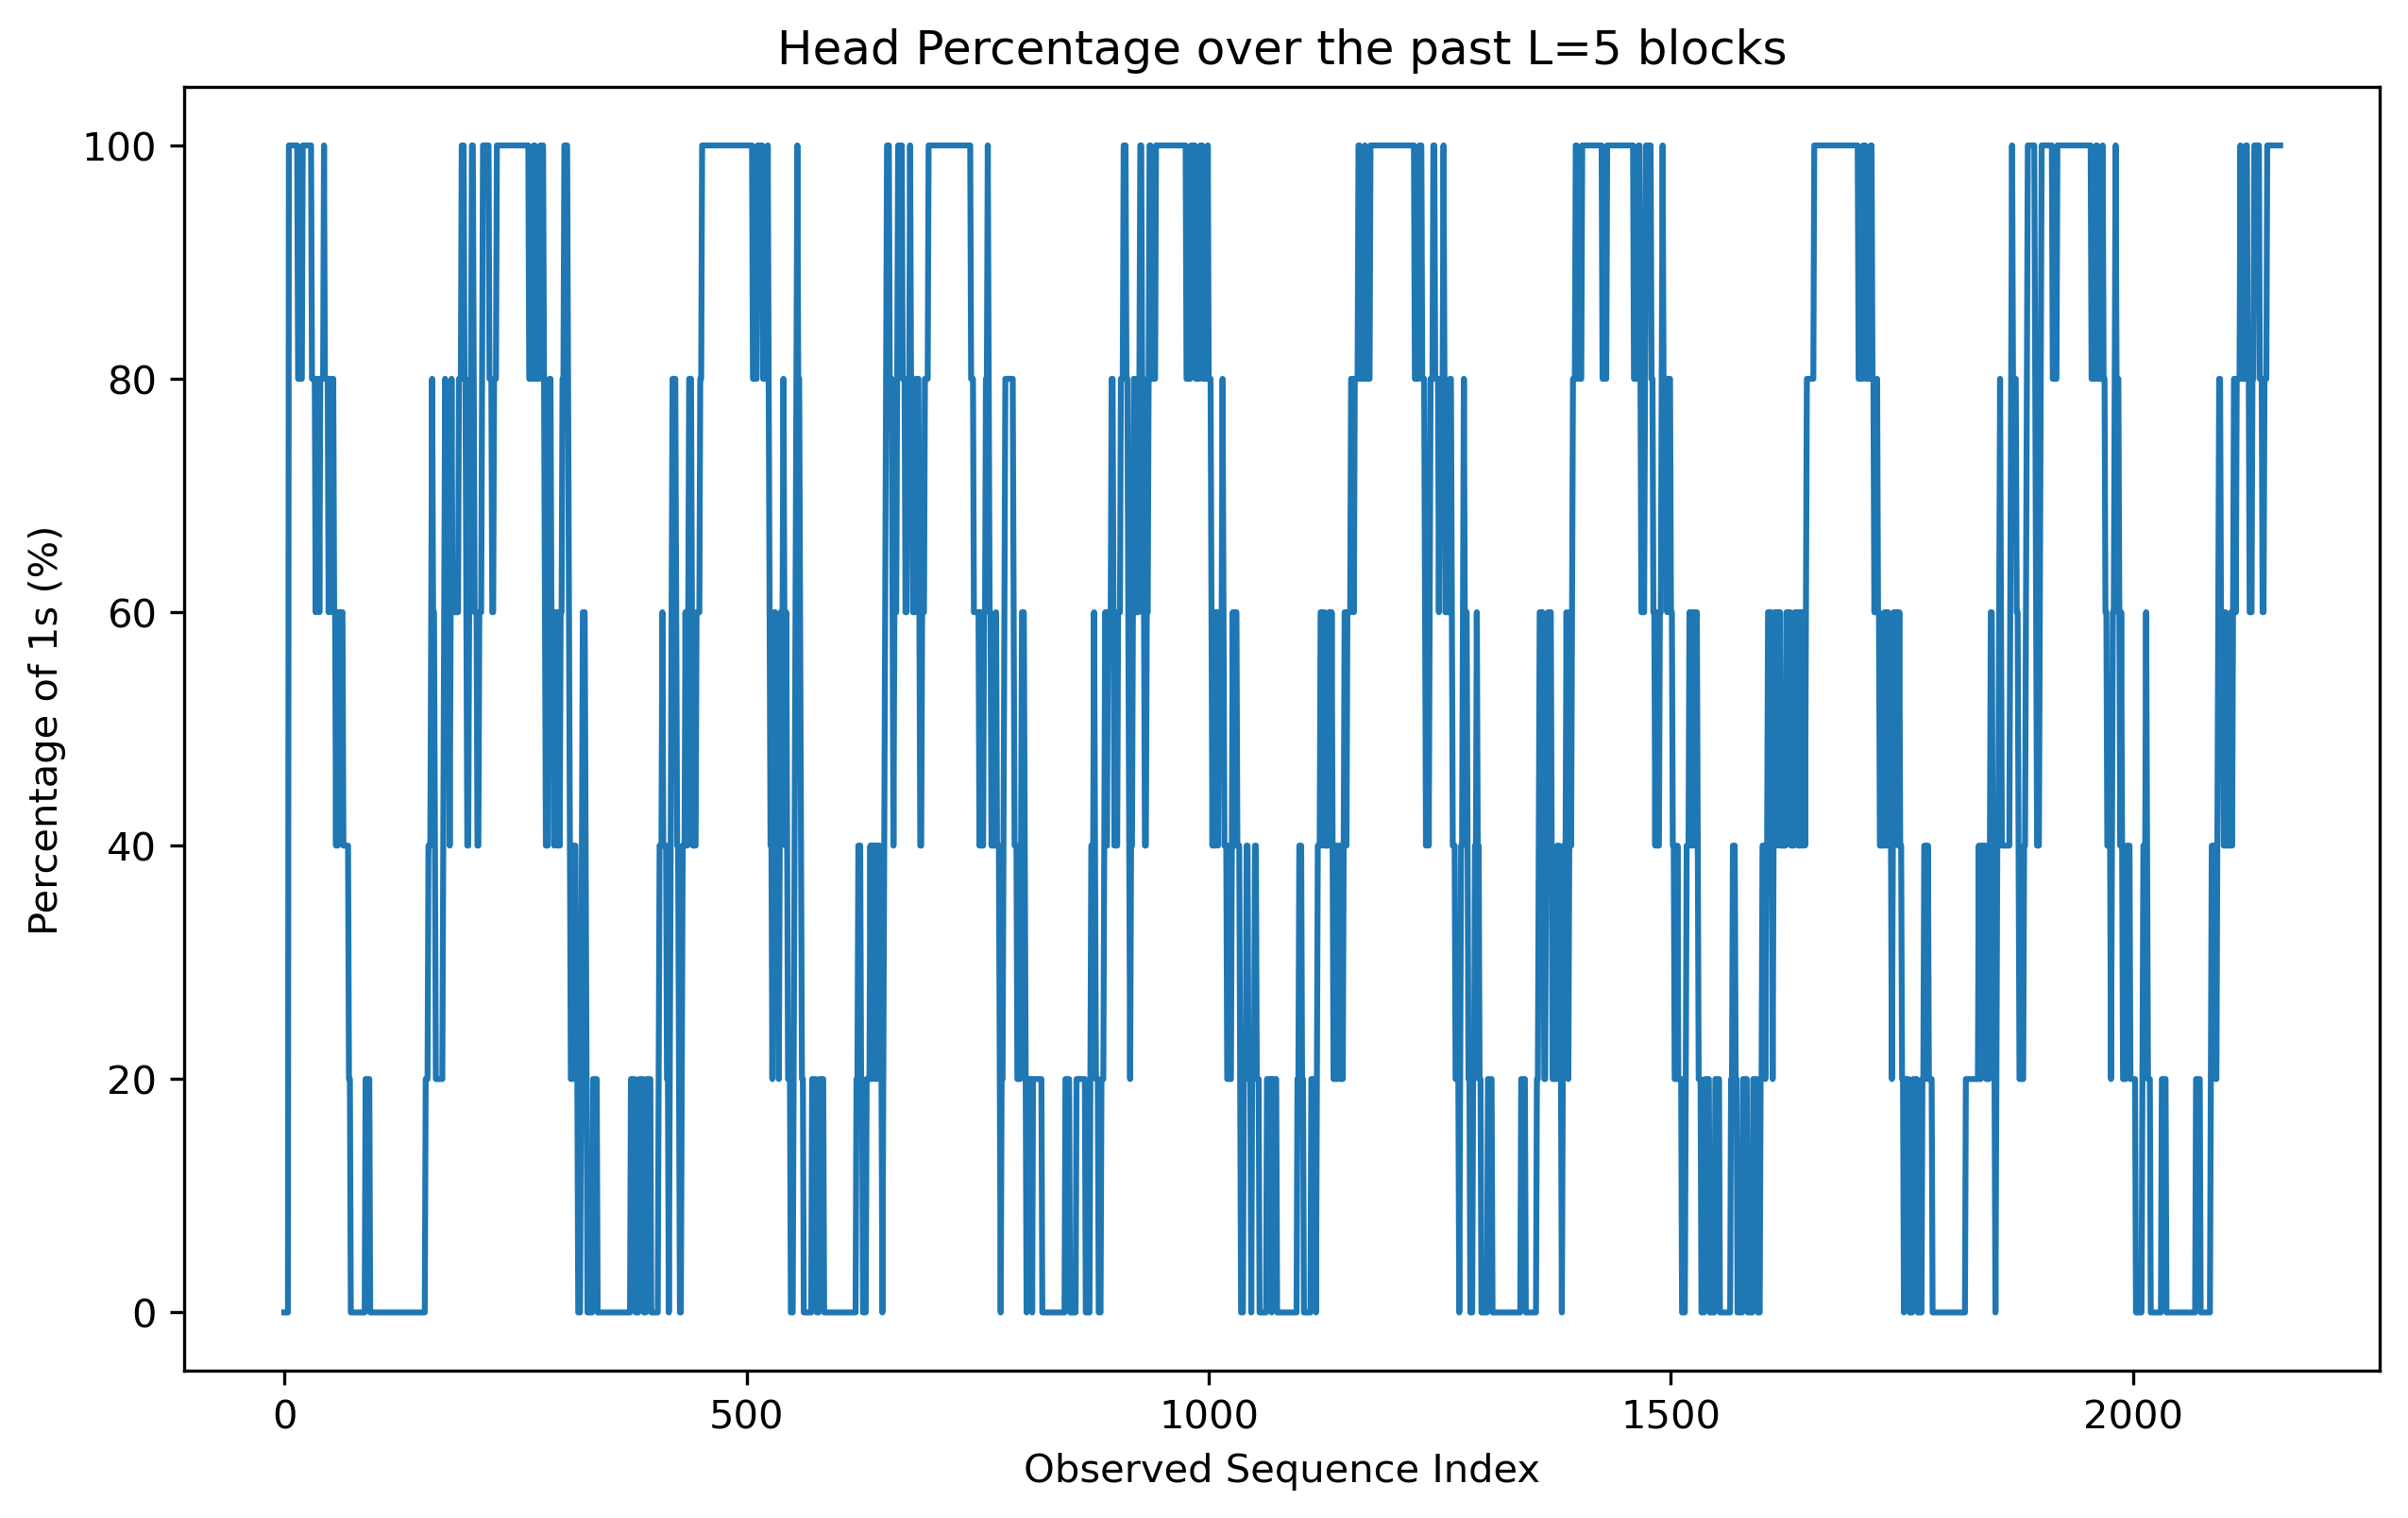

In [447]:
plot_head_percentage_block(Observed_sequnce_overal,L=5)

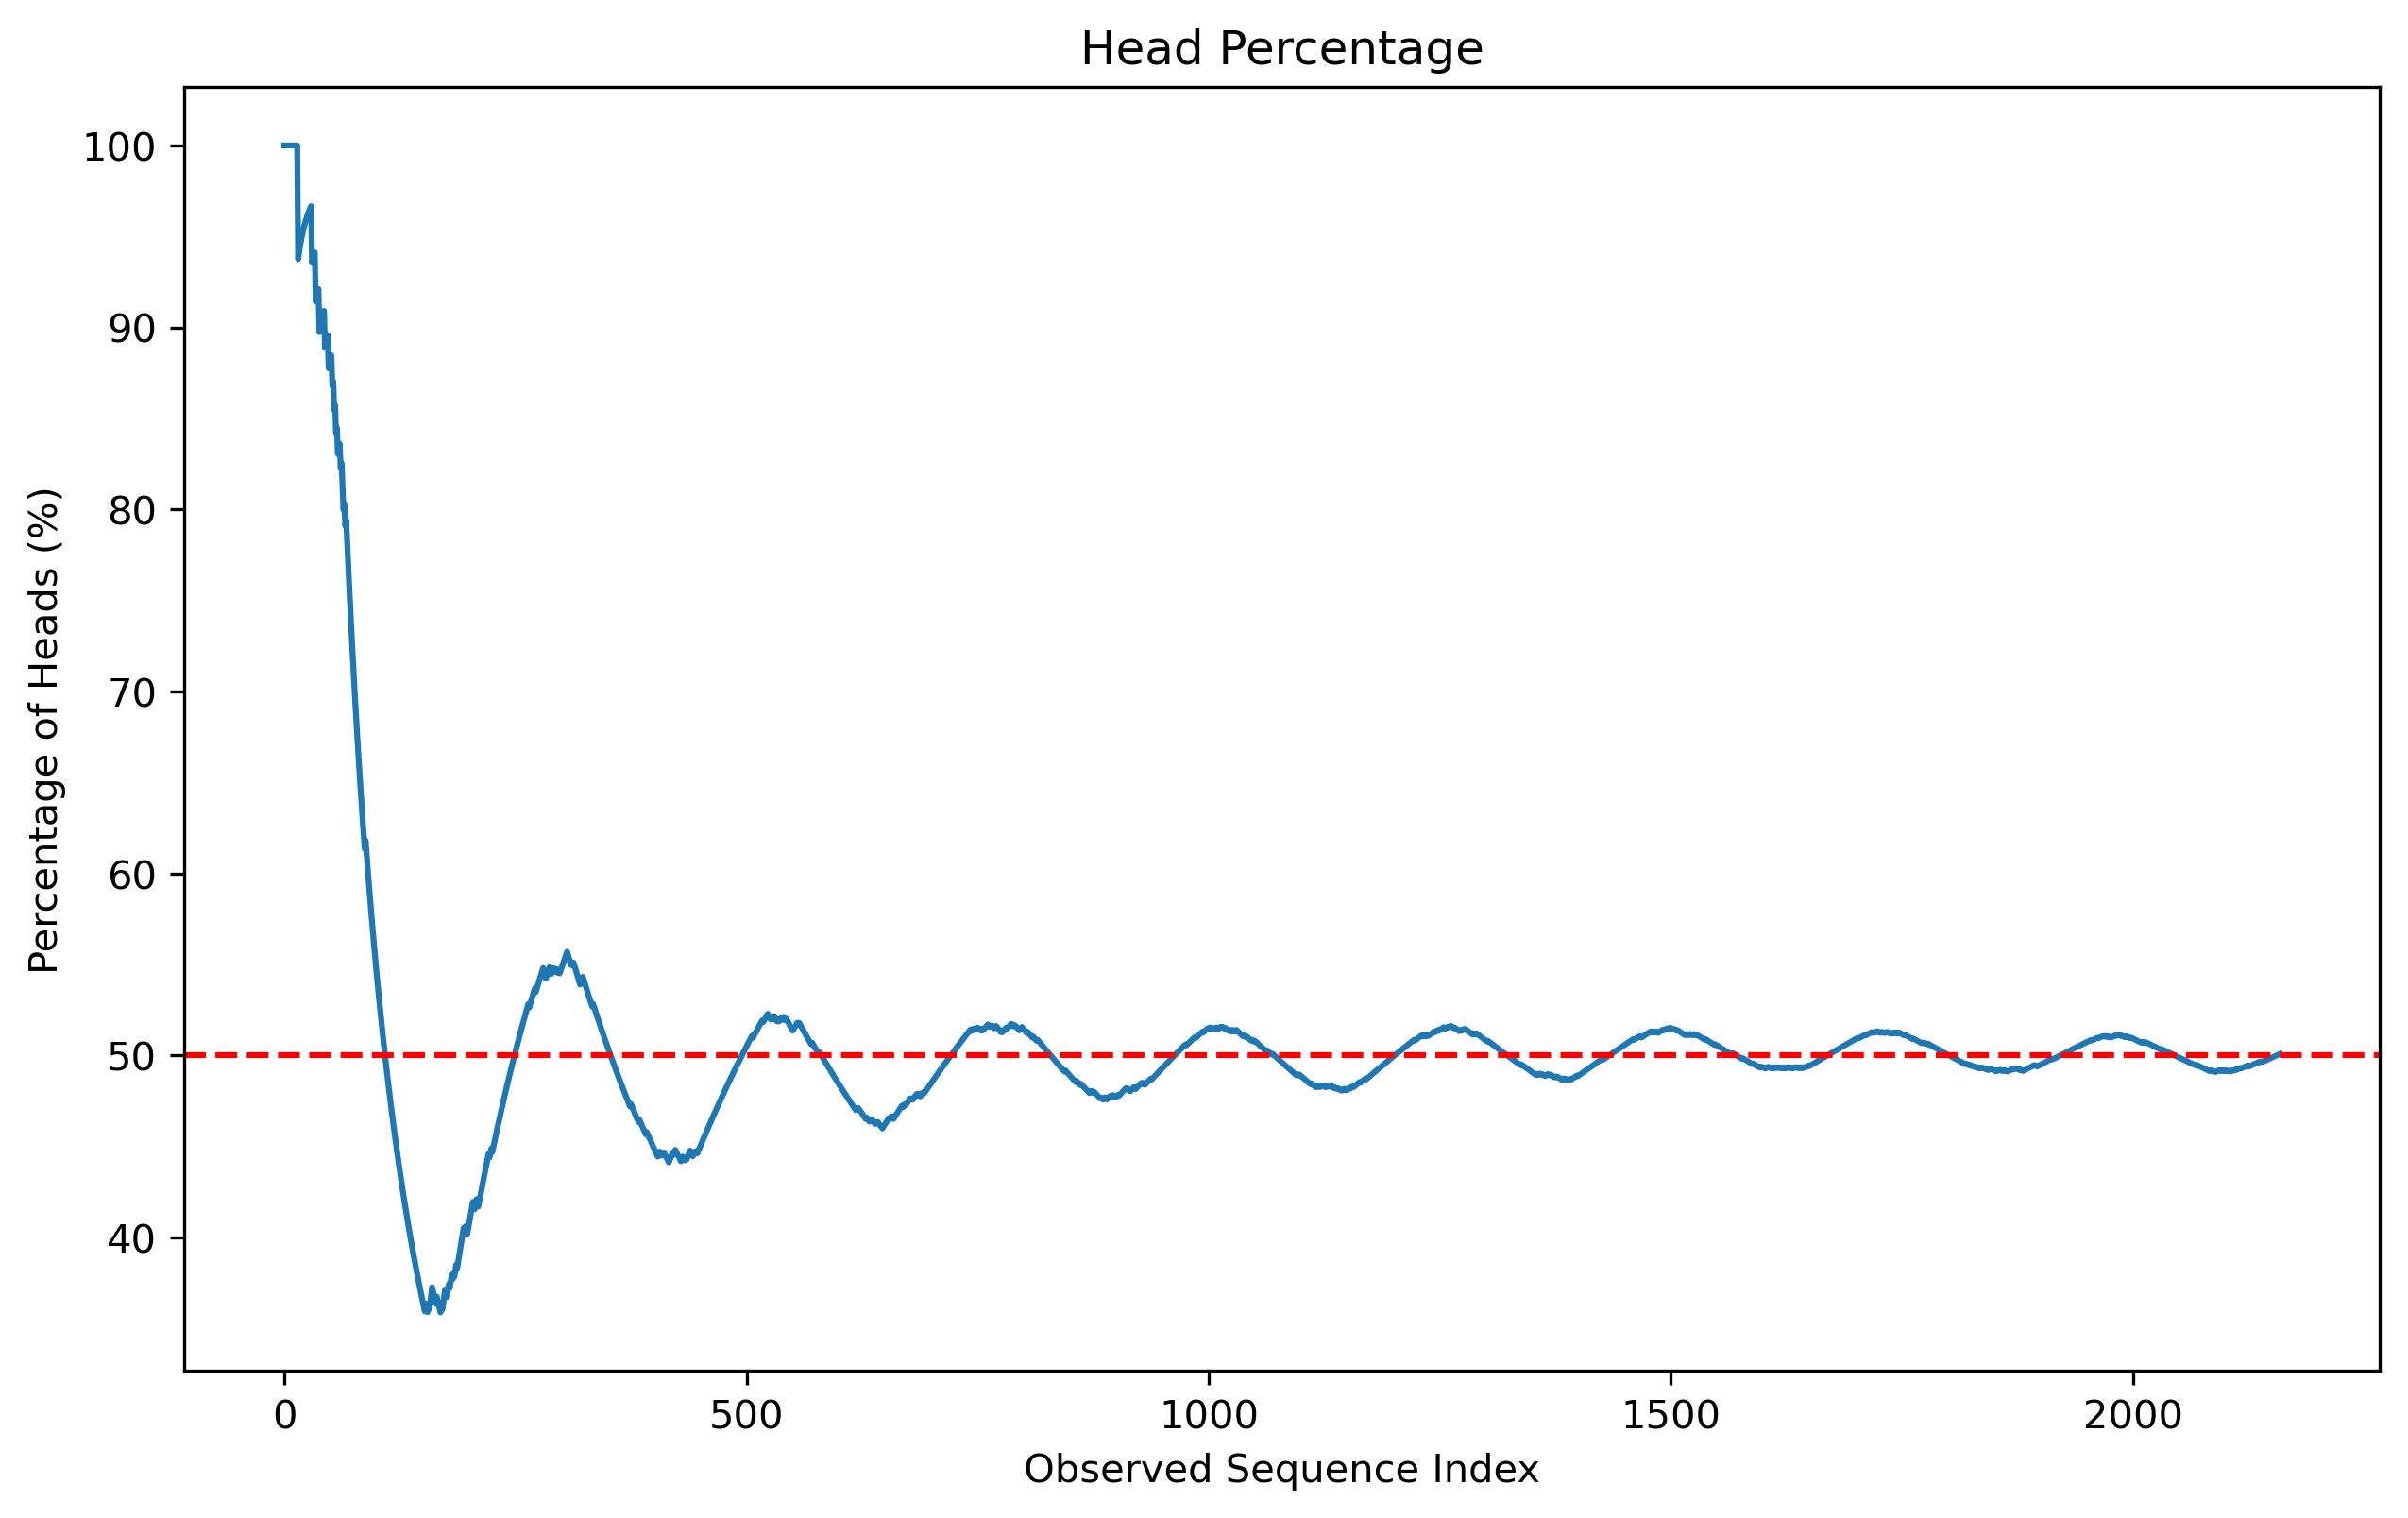

In [448]:
plot_head_percentage(Observed_sequnce_overal)

In [449]:
import matplotlib.pyplot as plt

def plot_head_percentage_blocks(string, L_values):
    indices = list(range(len(string)))
    plt.figure(figsize=(8, 6), dpi=300)

    for L in L_values:
        cumulative_counts_h = []
        total_count = 0
        head_percentages = []

        for index, char in enumerate(string):
            if char == 'H':
                total_count += 1

            cumulative_counts_h.append(total_count)

            if index >= L - 1:
                heads_in_last_L_blocks = cumulative_counts_h[index] - cumulative_counts_h[index - L]
                head_percentage = (heads_in_last_L_blocks / L) * 100
                head_percentages.append(head_percentage)
            else:
                head_percentages.append(0)  # Not enough data for L blocks yet

        plt.plot(indices, head_percentages, label='L={}'.format(L))

    plt.xlabel('Observed Sequnce Index')
    plt.ylabel('Percentage of 1s (%)')
    plt.title('1s Percentage over the past L blocks')
    plt.grid(True,which='both')
    plt.legend(loc='lower right')
    plt.show()

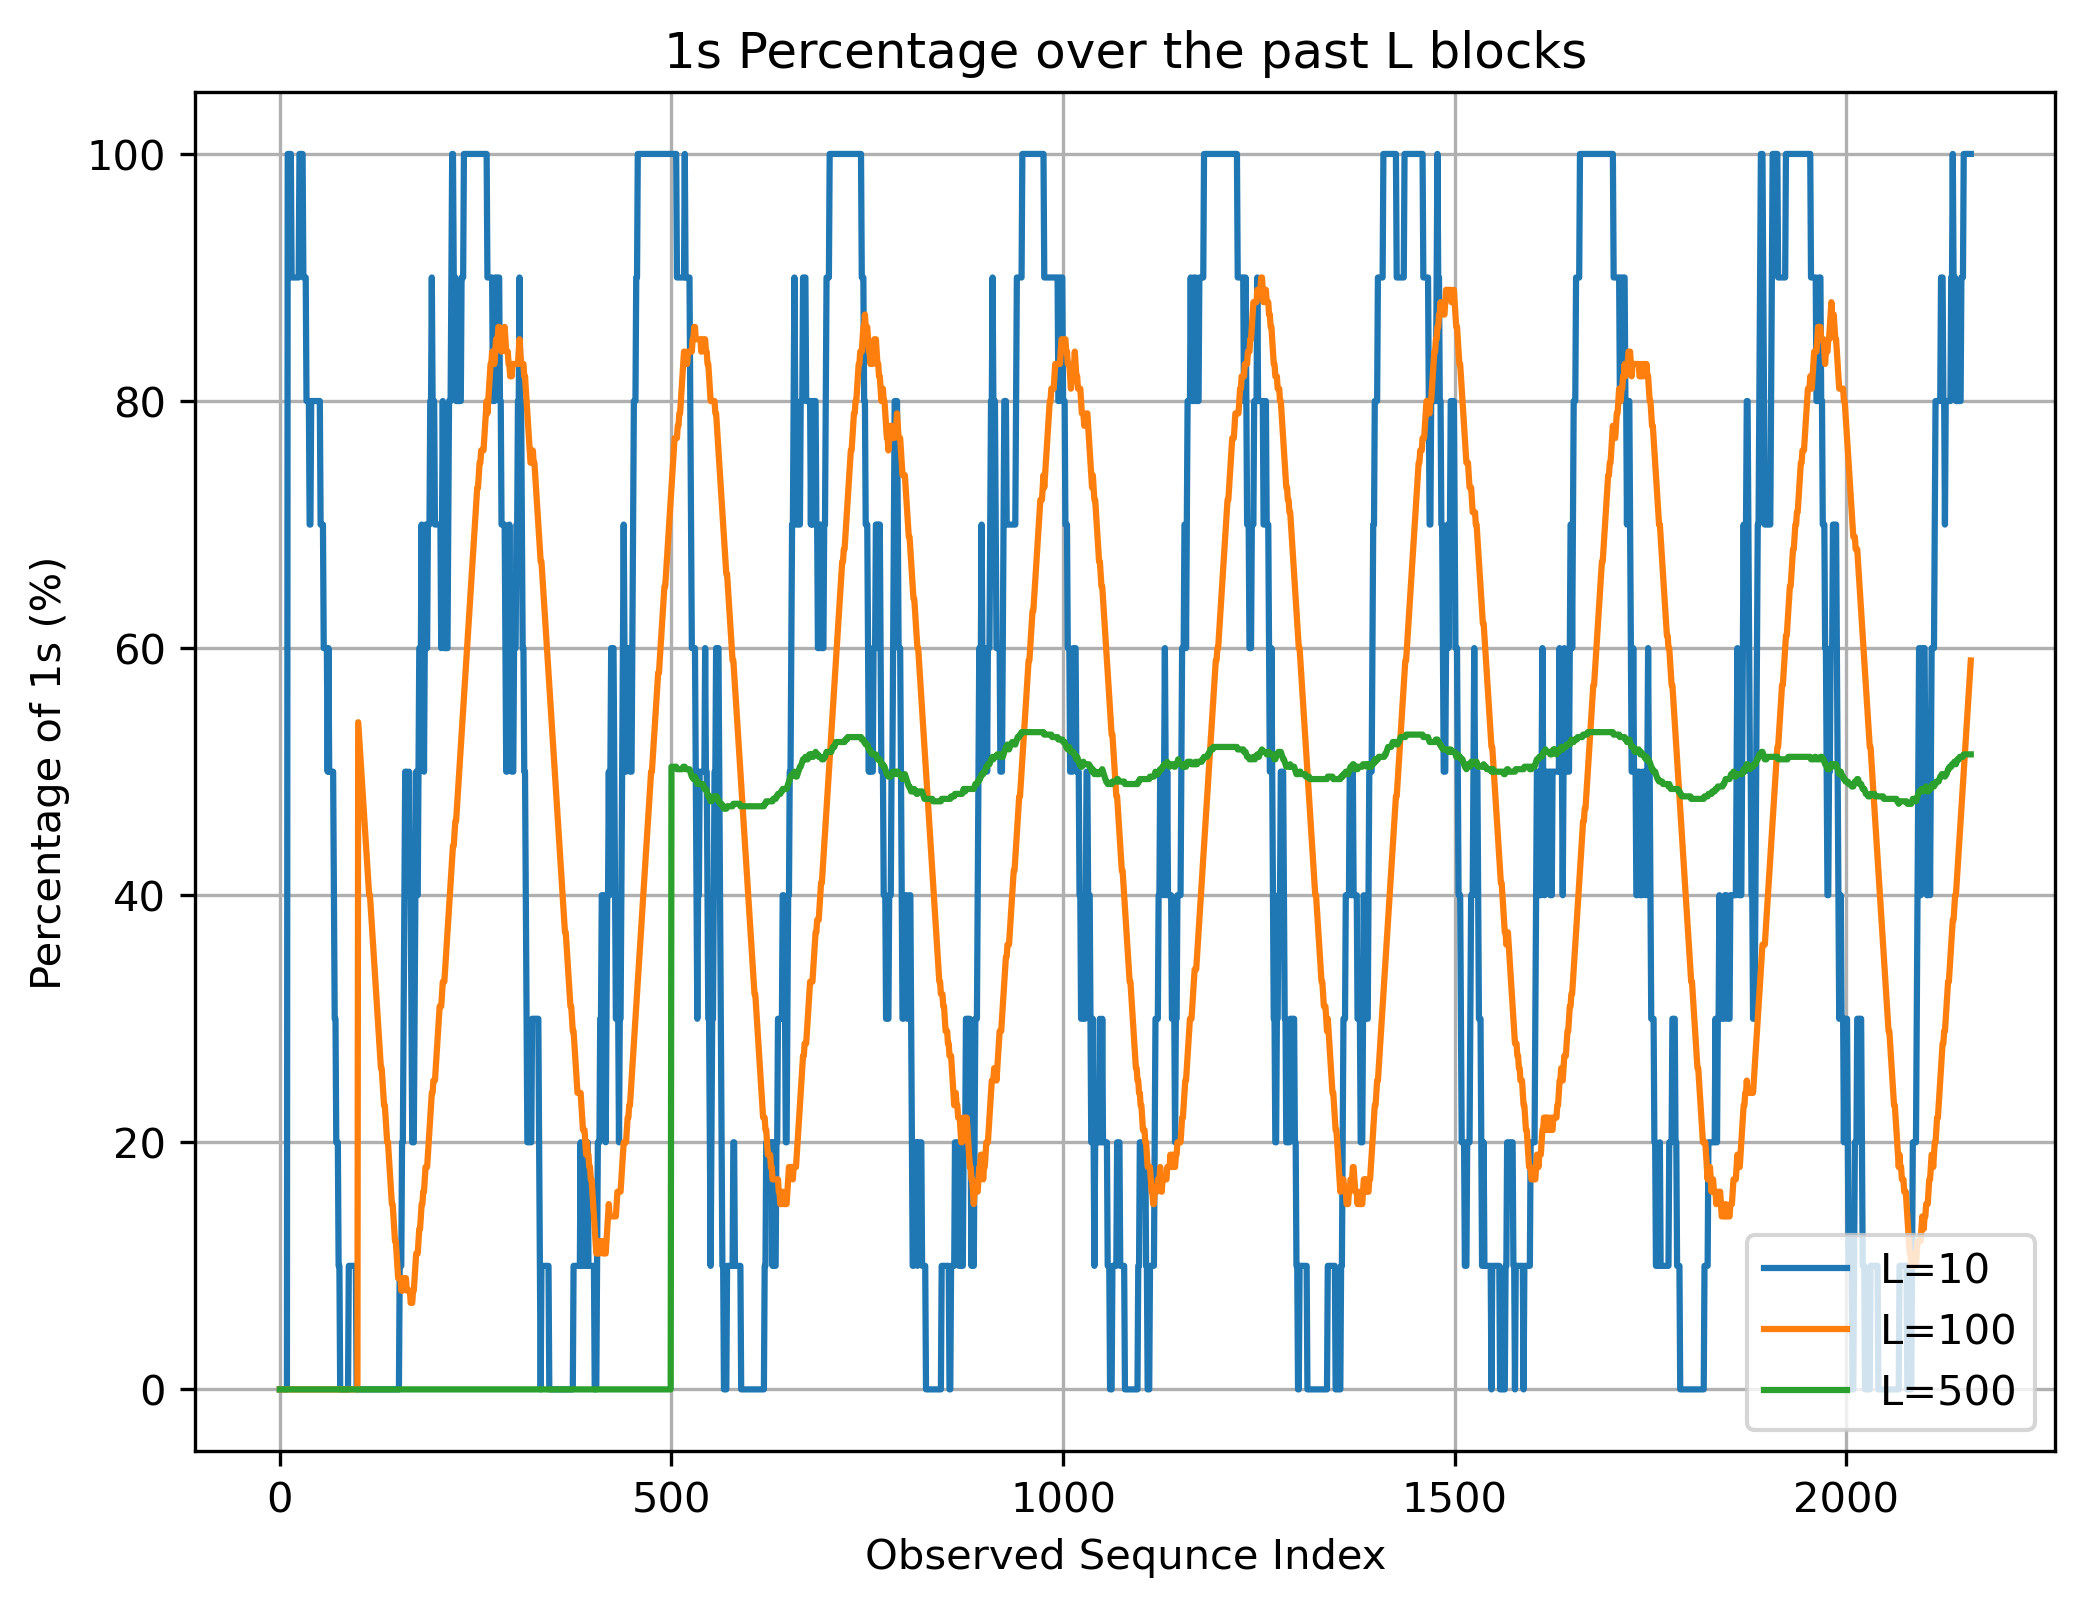

In [450]:
plot_head_percentage_blocks(Observed_sequnce_overal, L_values=[10,100,500])

In [451]:
import matplotlib.pyplot as plt

def plot2_head_percentage_blocks(string, L_values):
    indices = list(range(len(string)))
    num_subplots = len(L_values)
    num_rows = 2
    num_cols = 3

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12), dpi=300)

    for i, L in enumerate(L_values):
        row = i // num_cols
        col = i % num_cols

        cumulative_counts_h = []
        total_count = 0
        head_percentages = []

        for index, char in enumerate(string):
            if char == 'H':
                total_count += 1

            cumulative_counts_h.append(total_count)

            if index >= L - 1:
                heads_in_last_L_blocks = cumulative_counts_h[index] - cumulative_counts_h[index - L]
                head_percentage = (heads_in_last_L_blocks / L) * 100
                head_percentages.append(head_percentage)
            else:
                head_percentages.append(0)  # Not enough data for L blocks yet
        
        axs[row, col].set_title('1s % over the past L blocks (L={})'.format(L))
        axs[row, col].plot(indices, head_percentages, label='L={}'.format(L))
        axs[row, col].set_xlabel('Observed Sequence Index')
        axs[row, col].set_ylabel('Percentage of Heads (%)')
        axs[row, col].grid(True, which='both')
        #axs[row, col].legend()

    plt.tight_layout()
    plt.show()


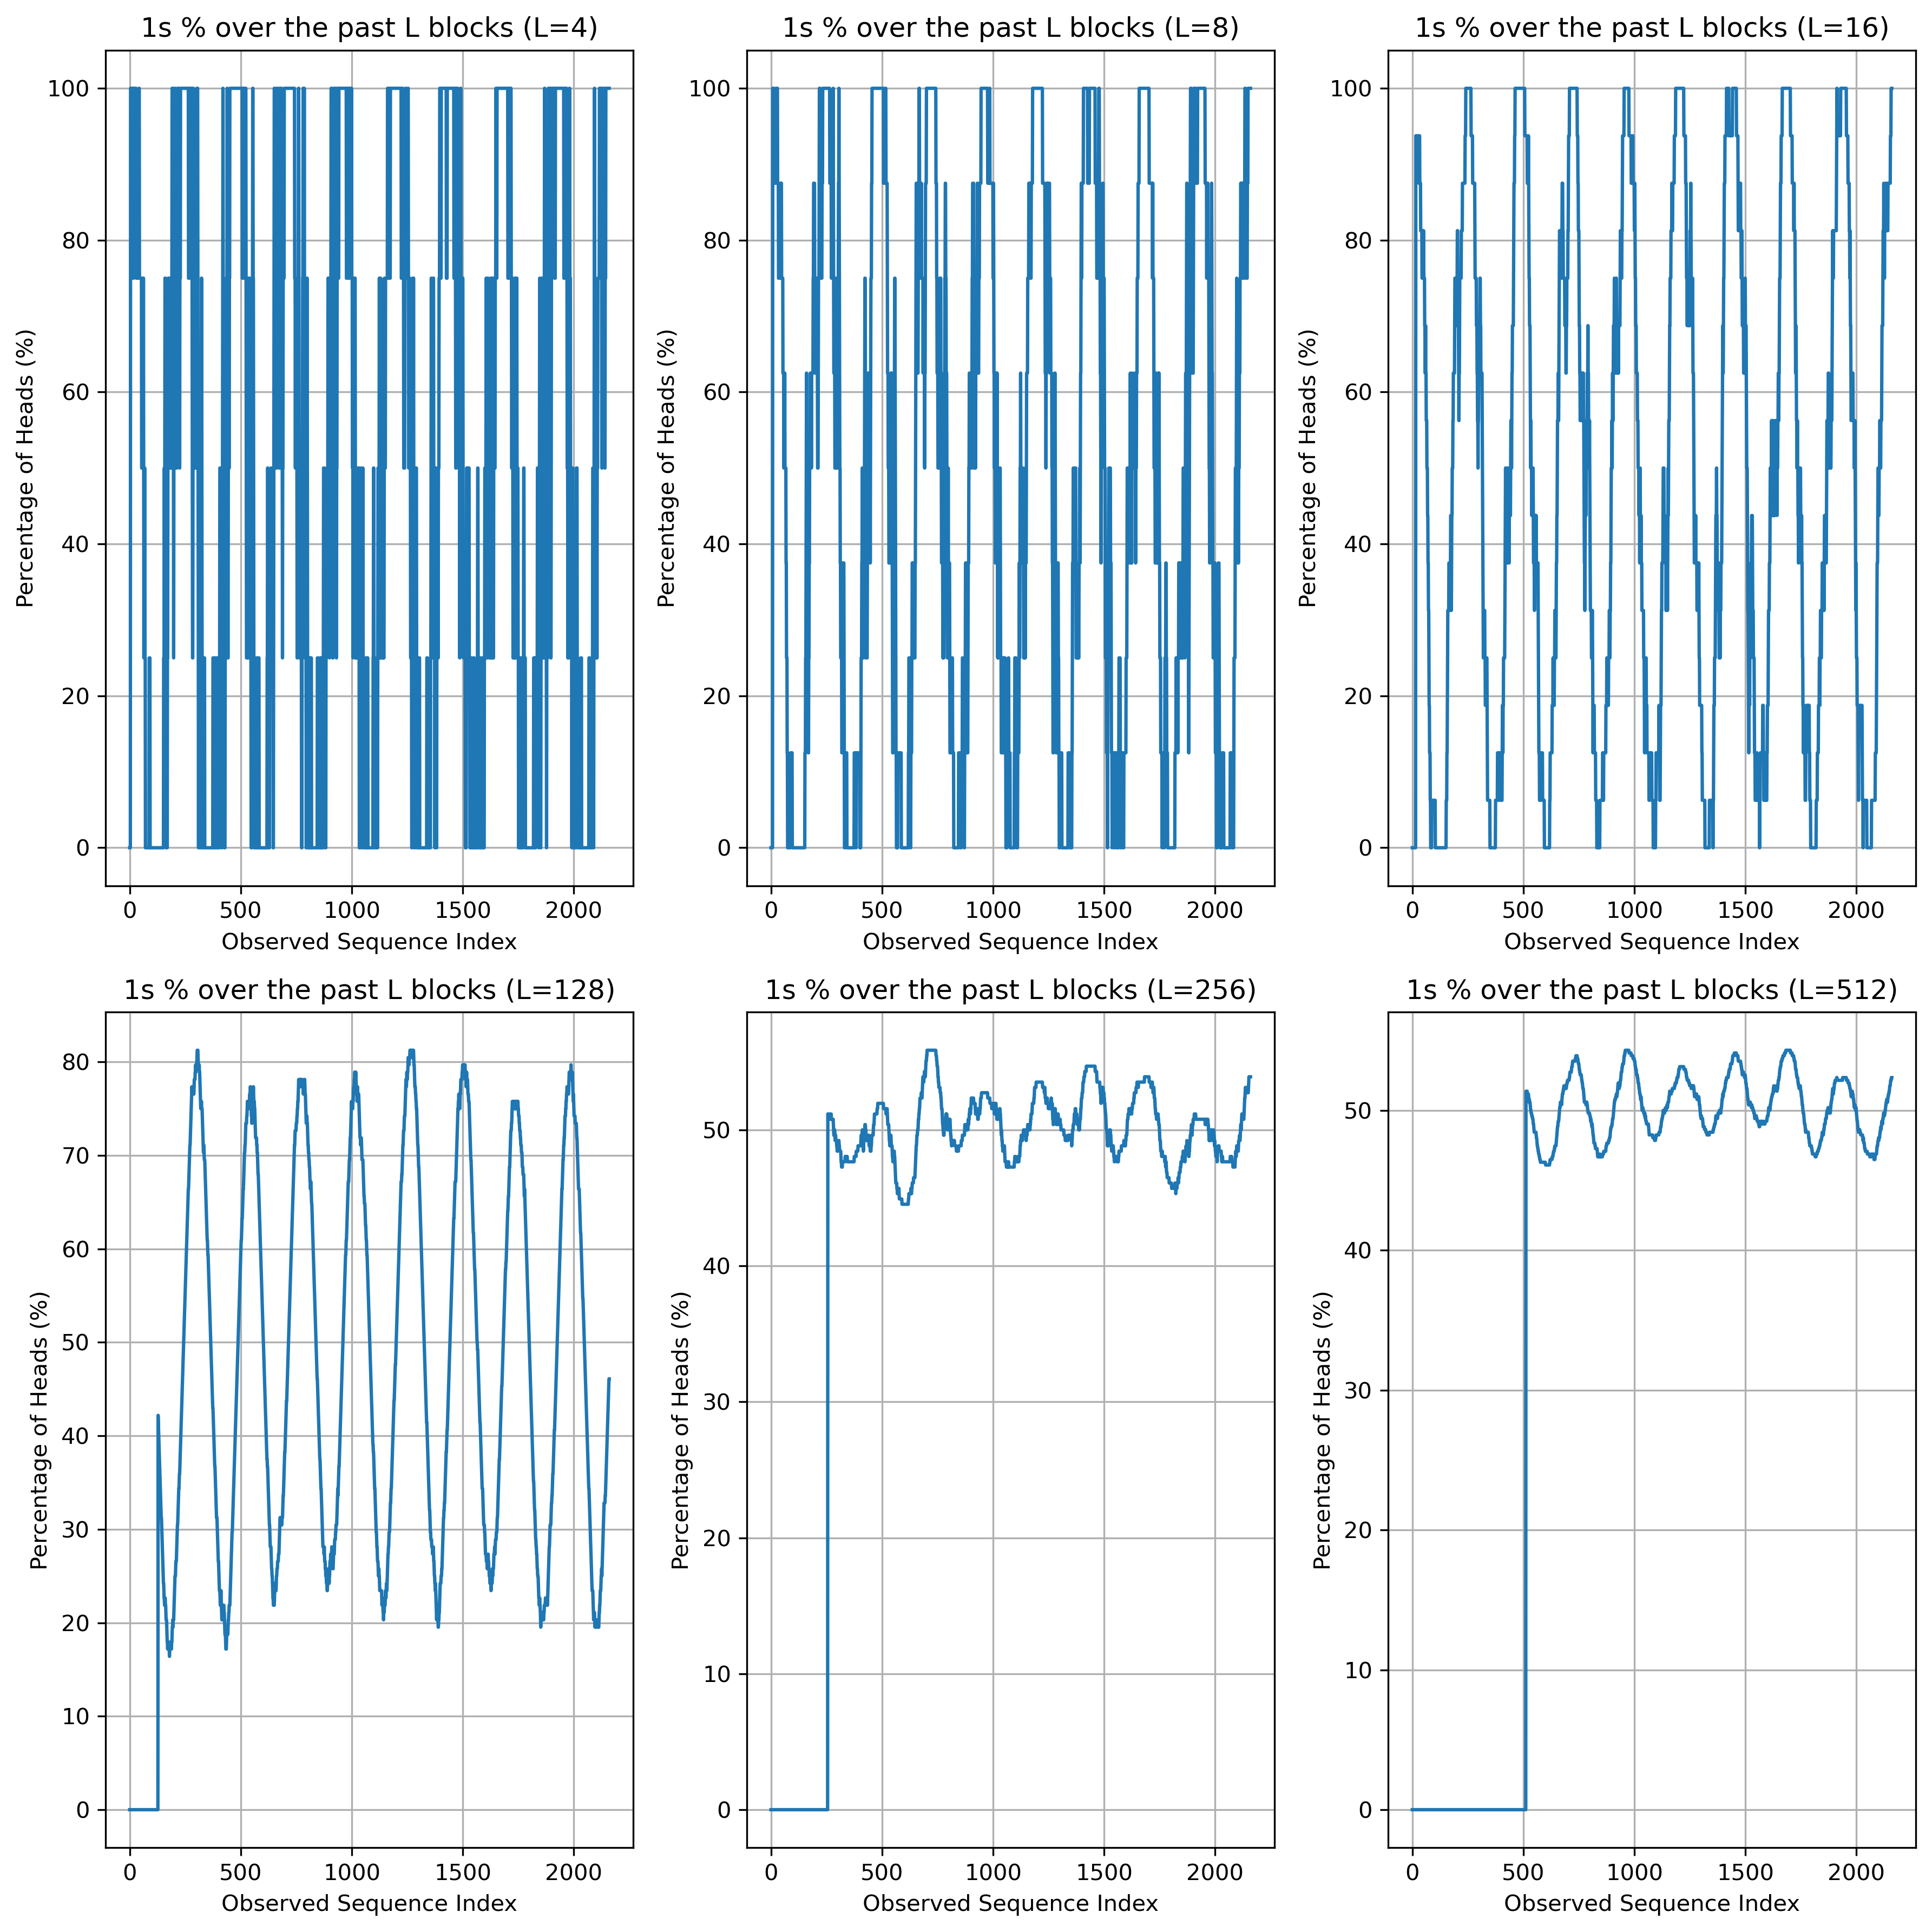

In [452]:
plot2_head_percentage_blocks(Observed_sequnce_overal,L_values=[4,8,16,128,256,512])

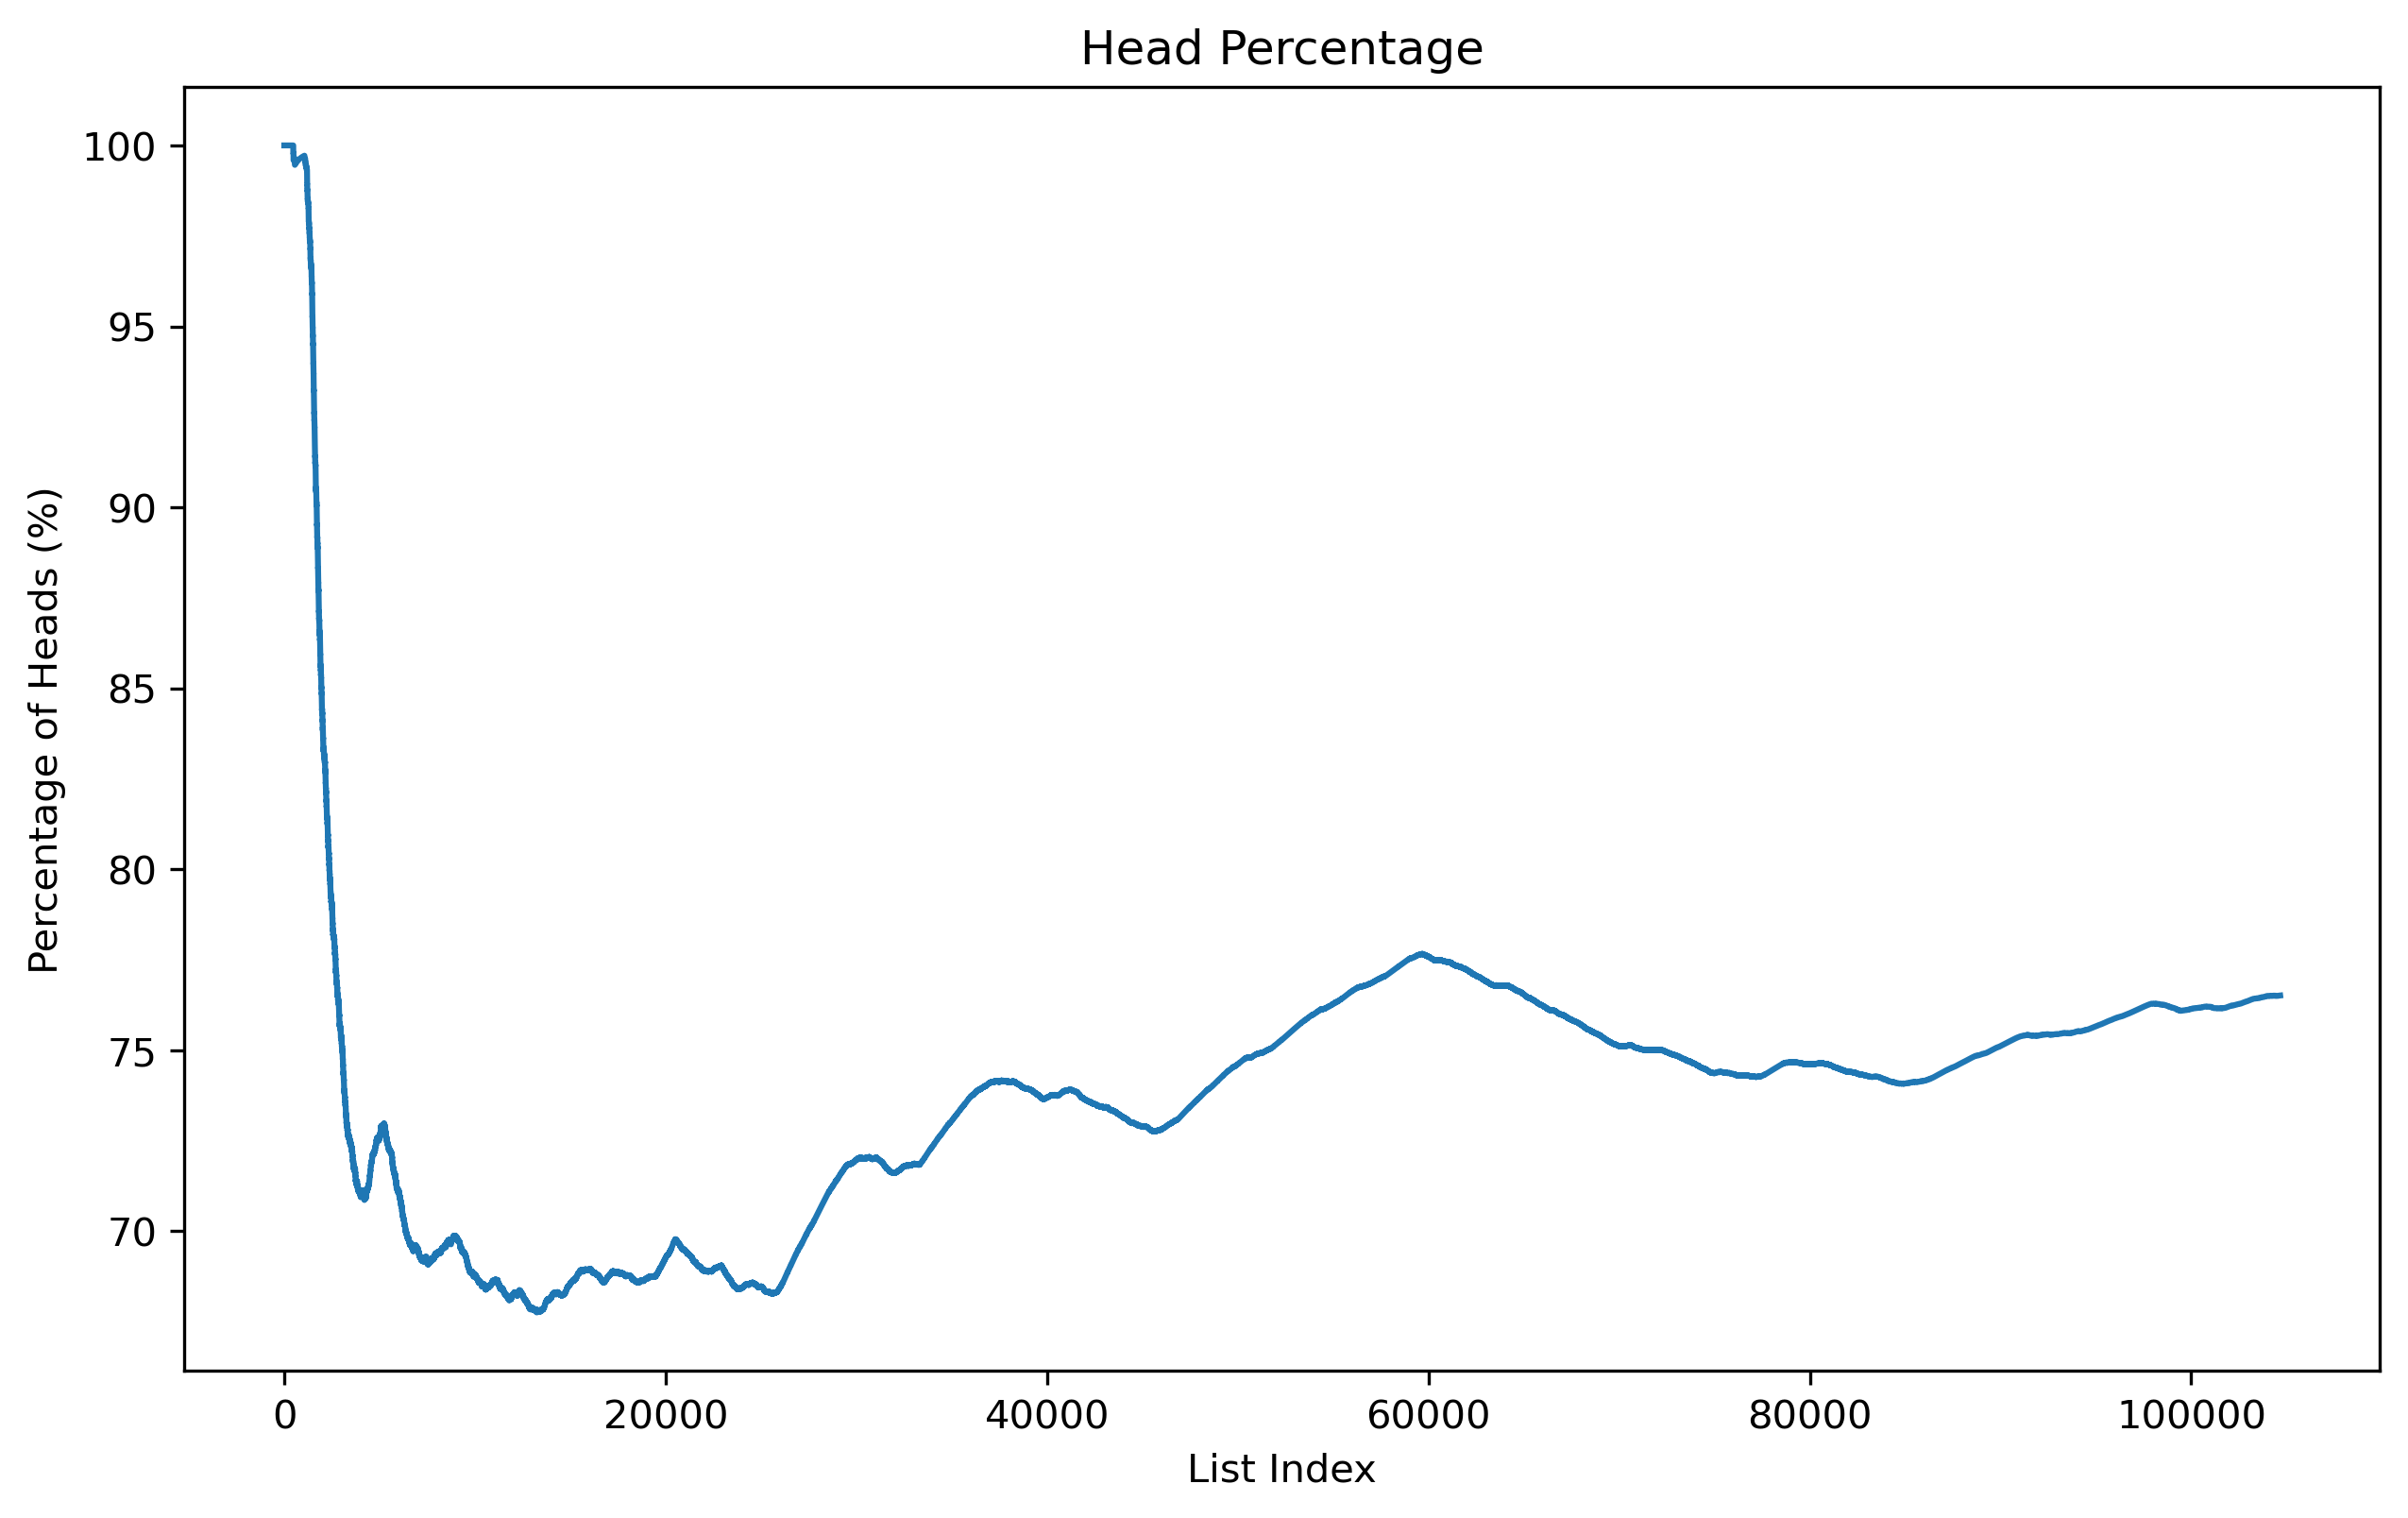

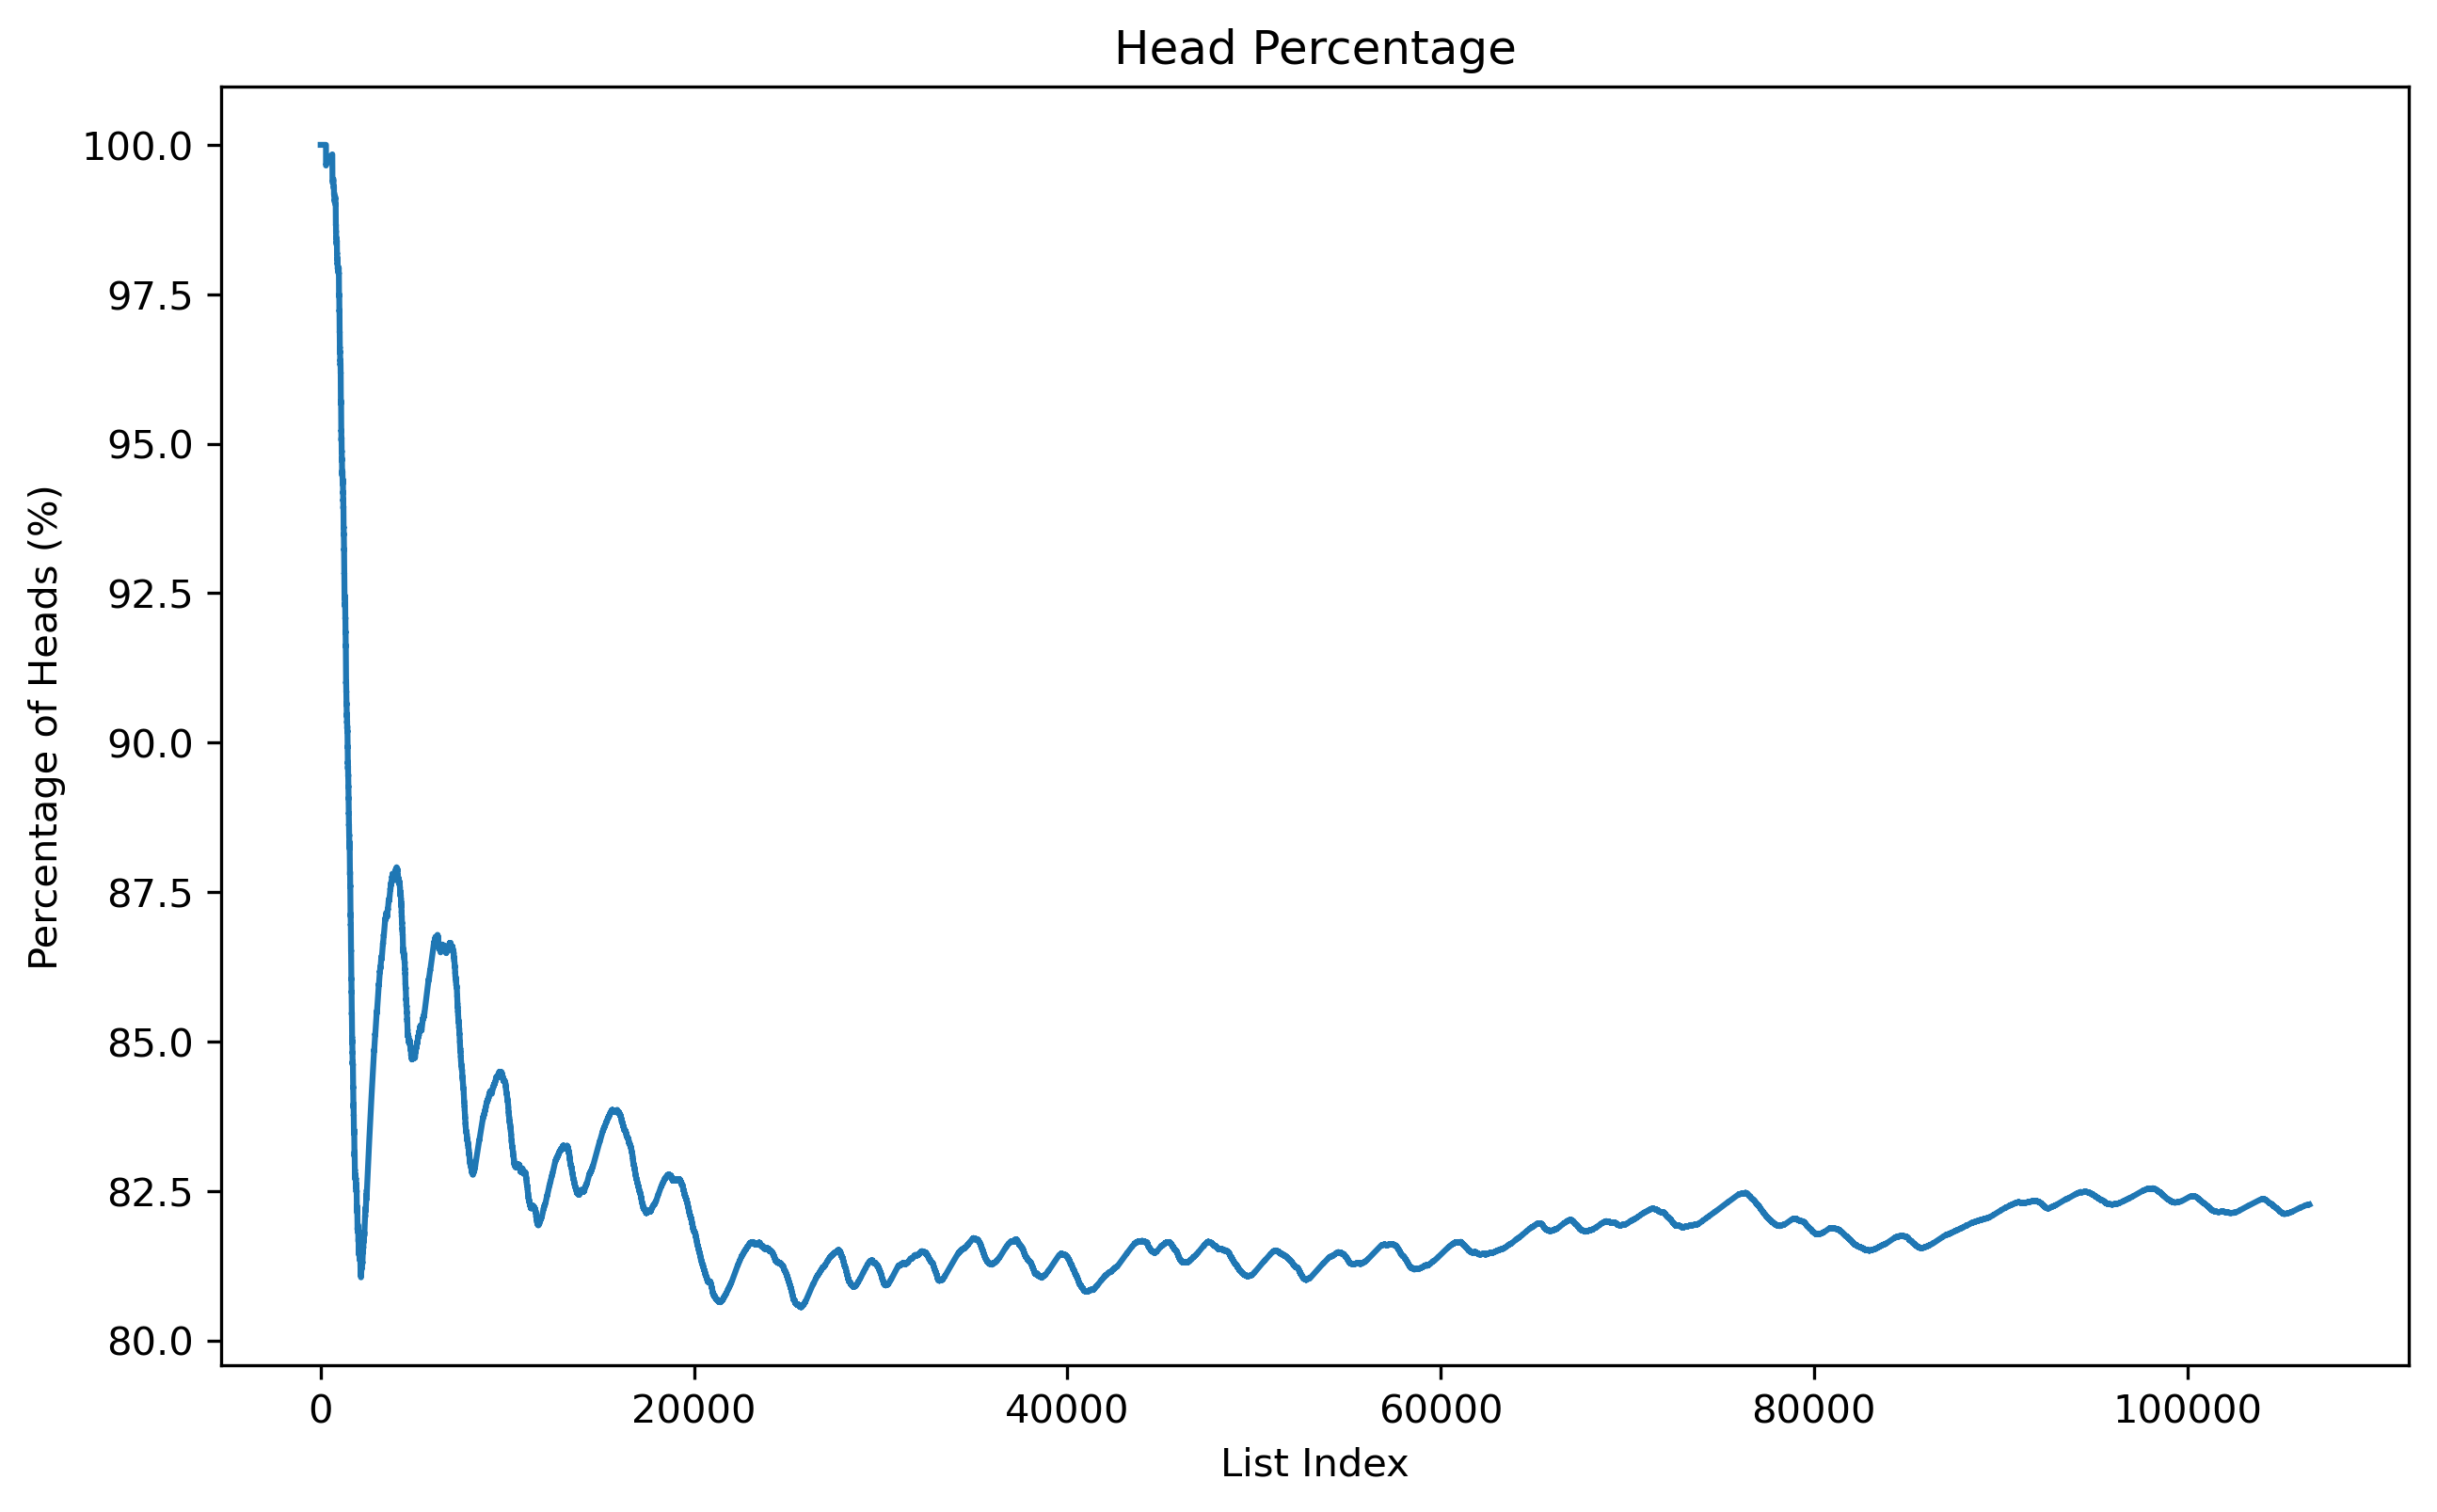

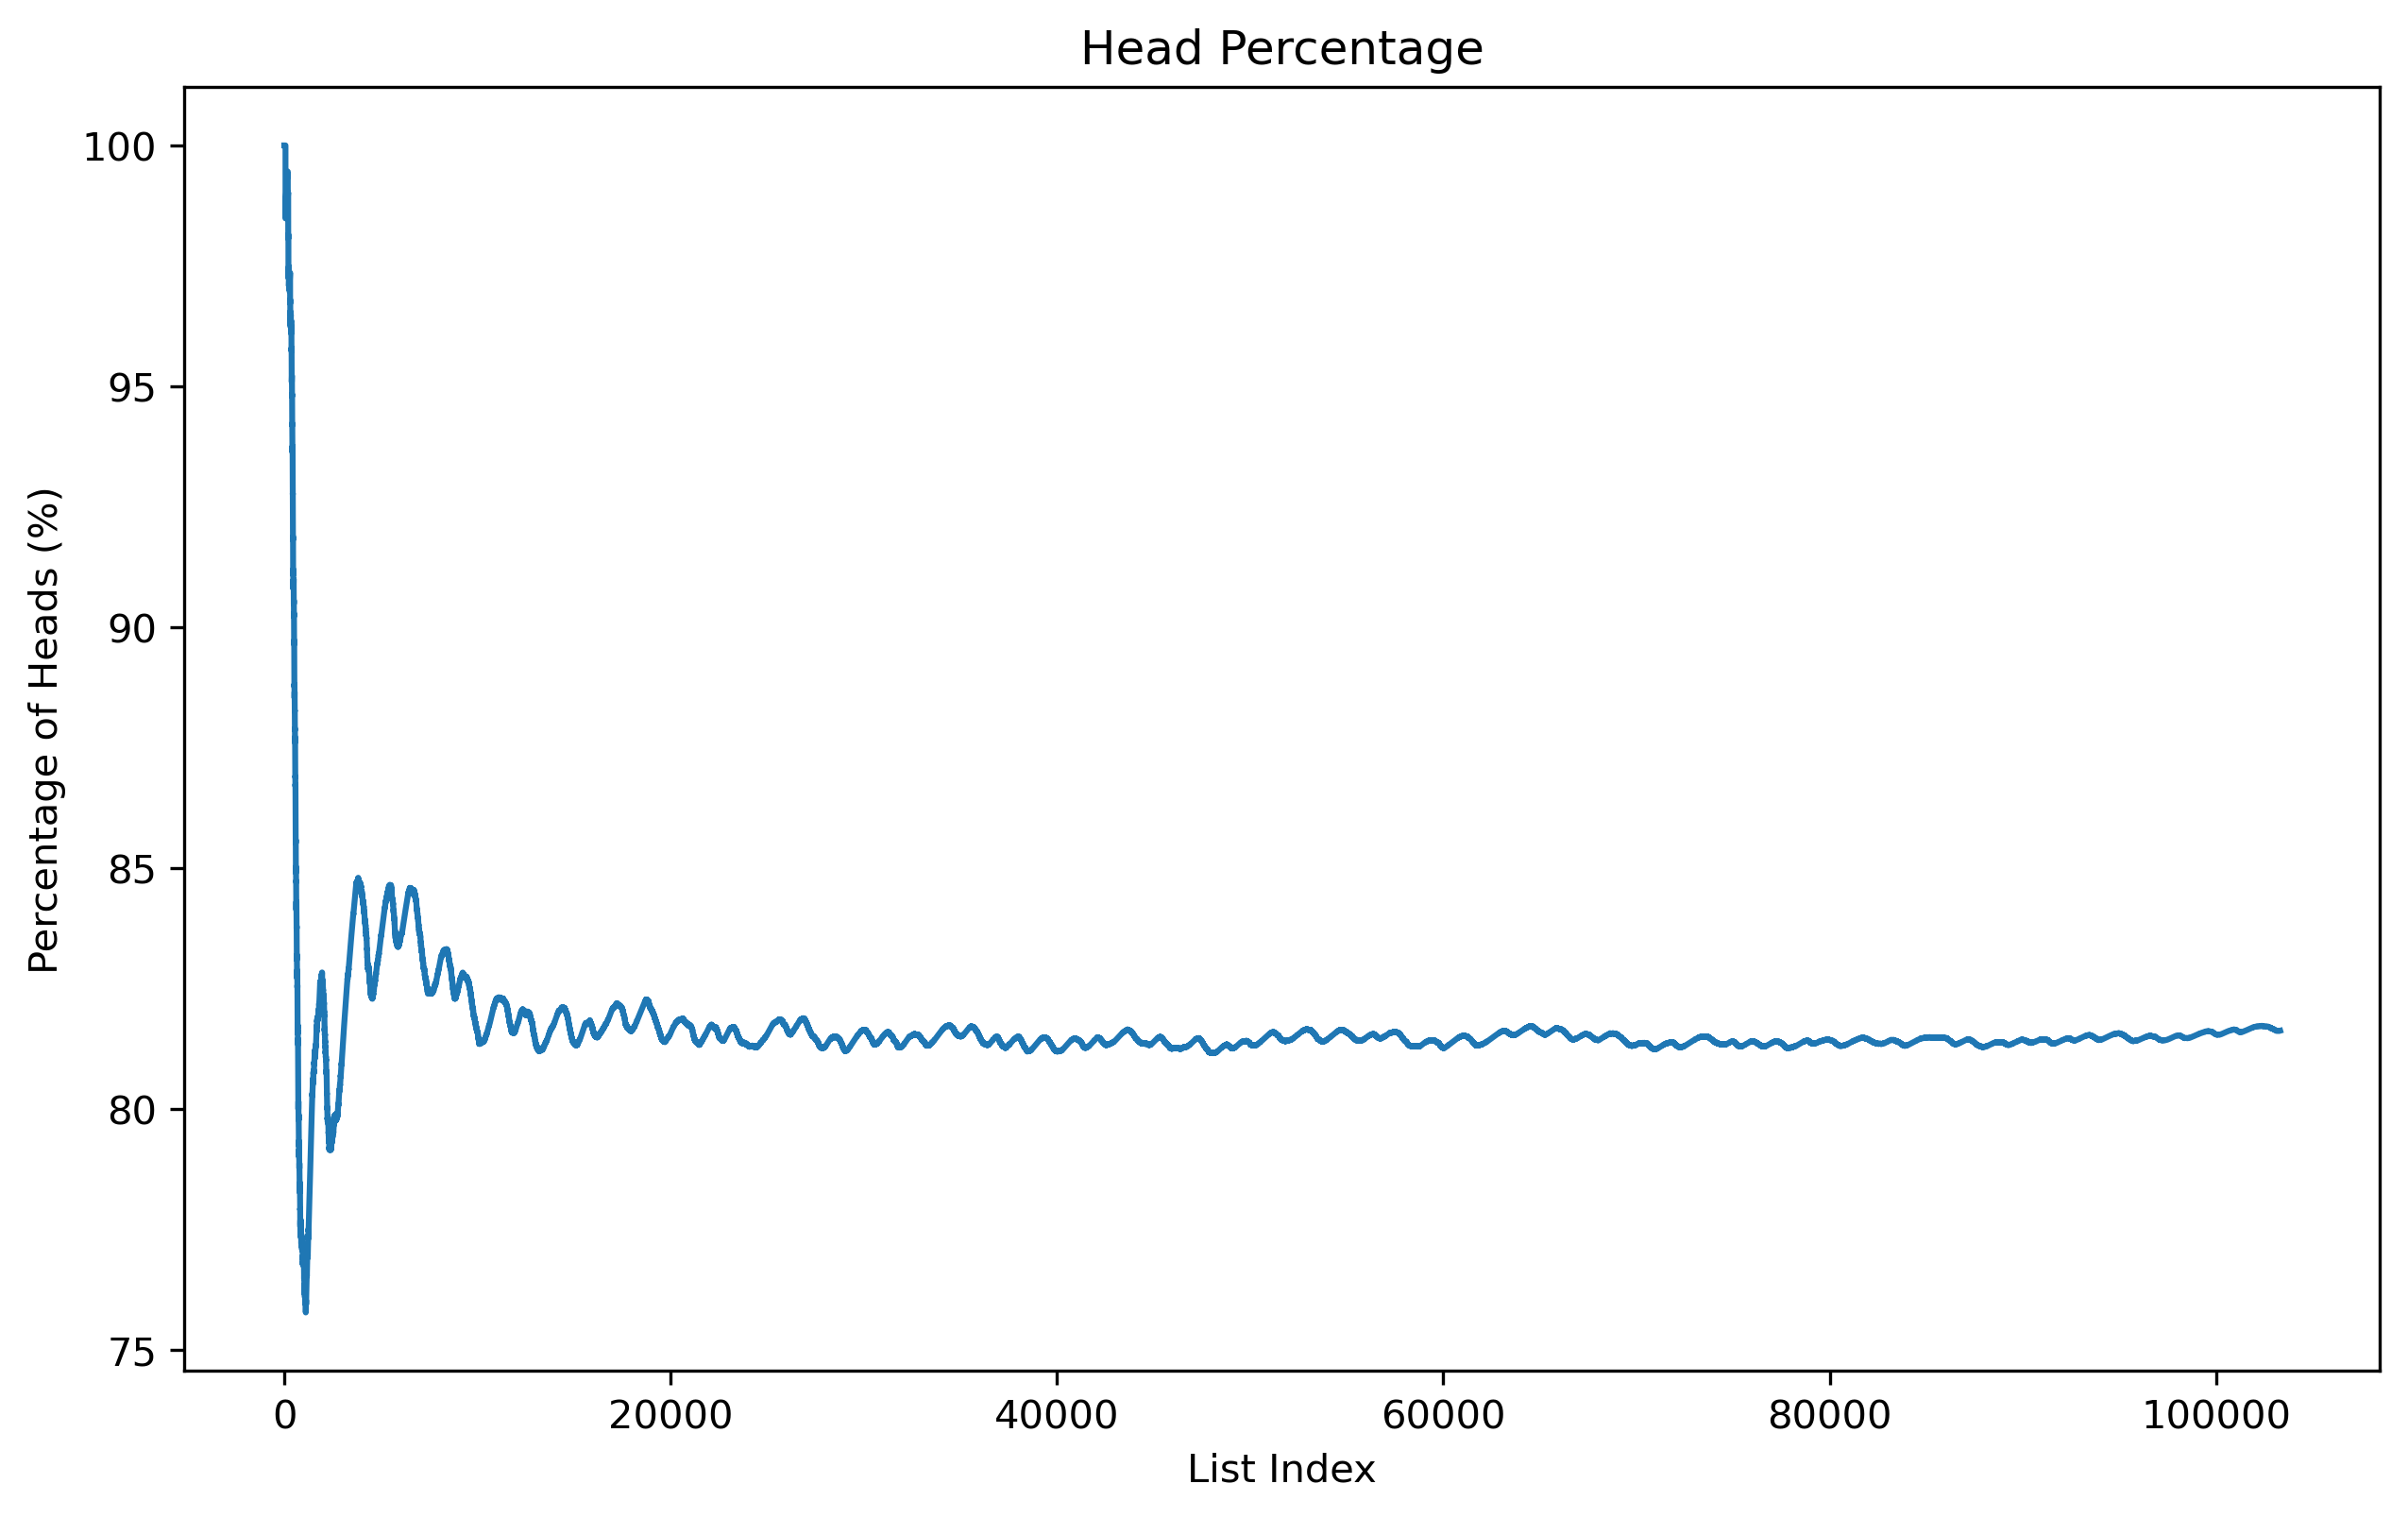

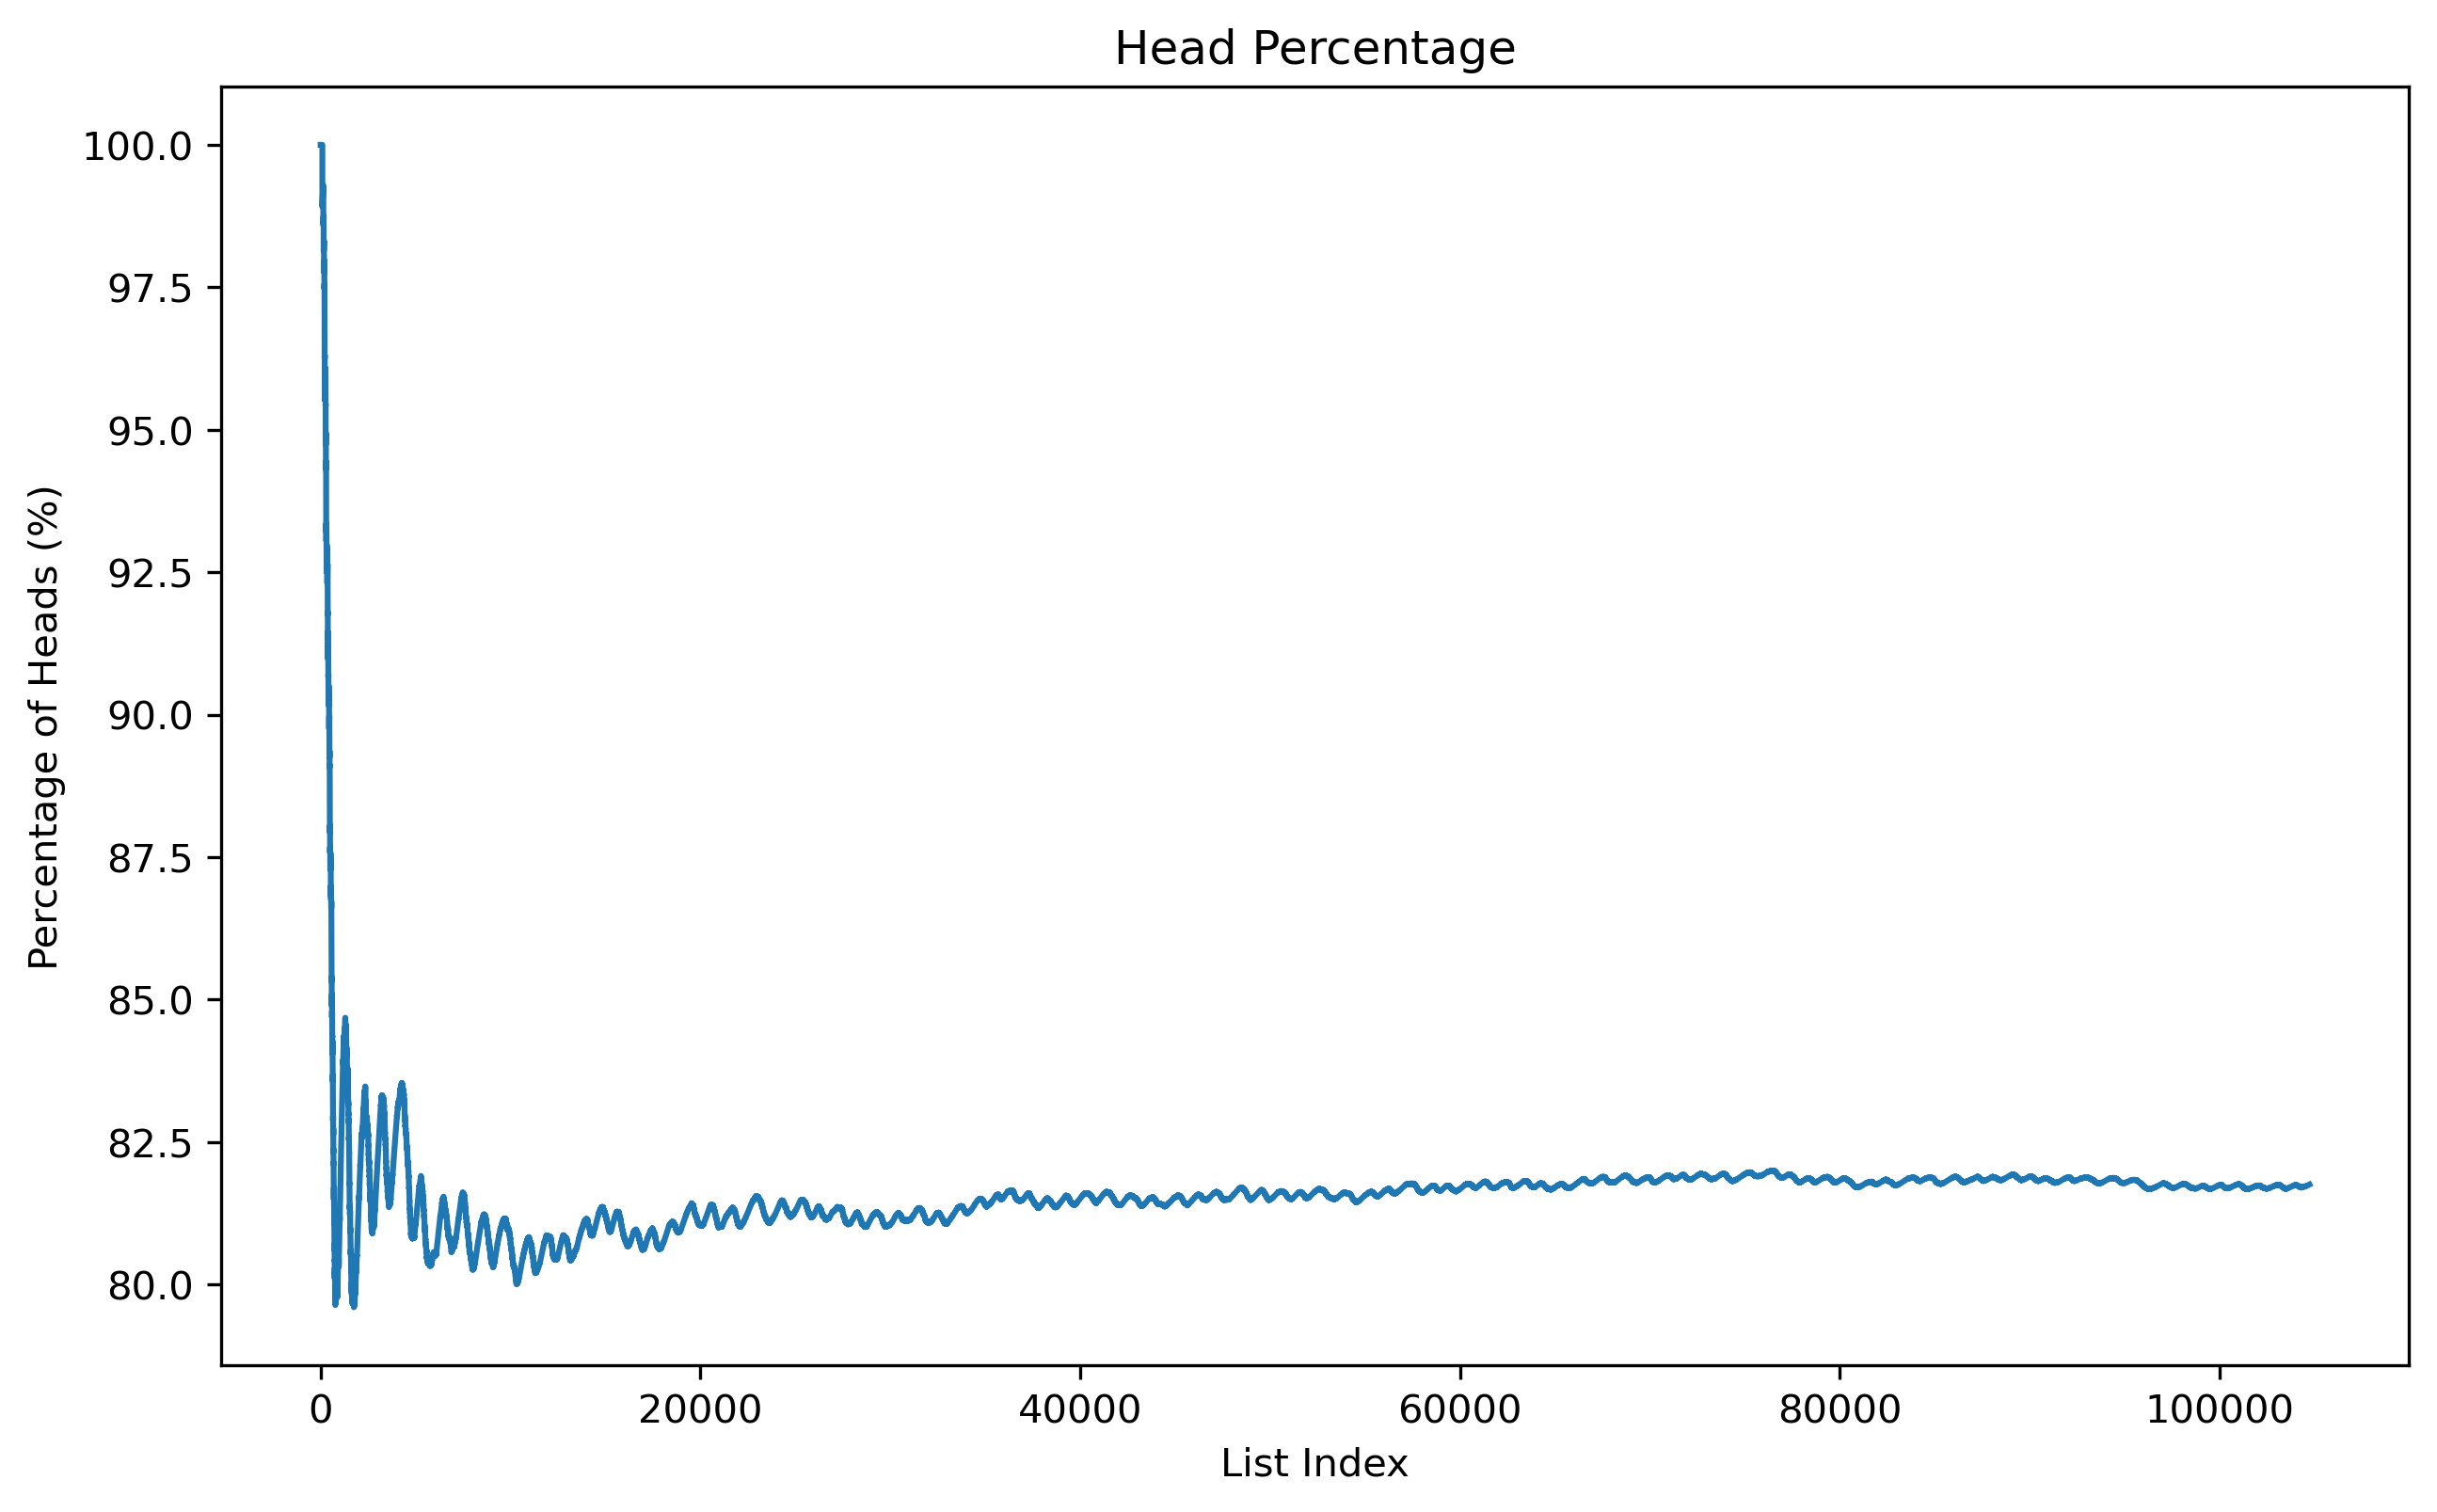

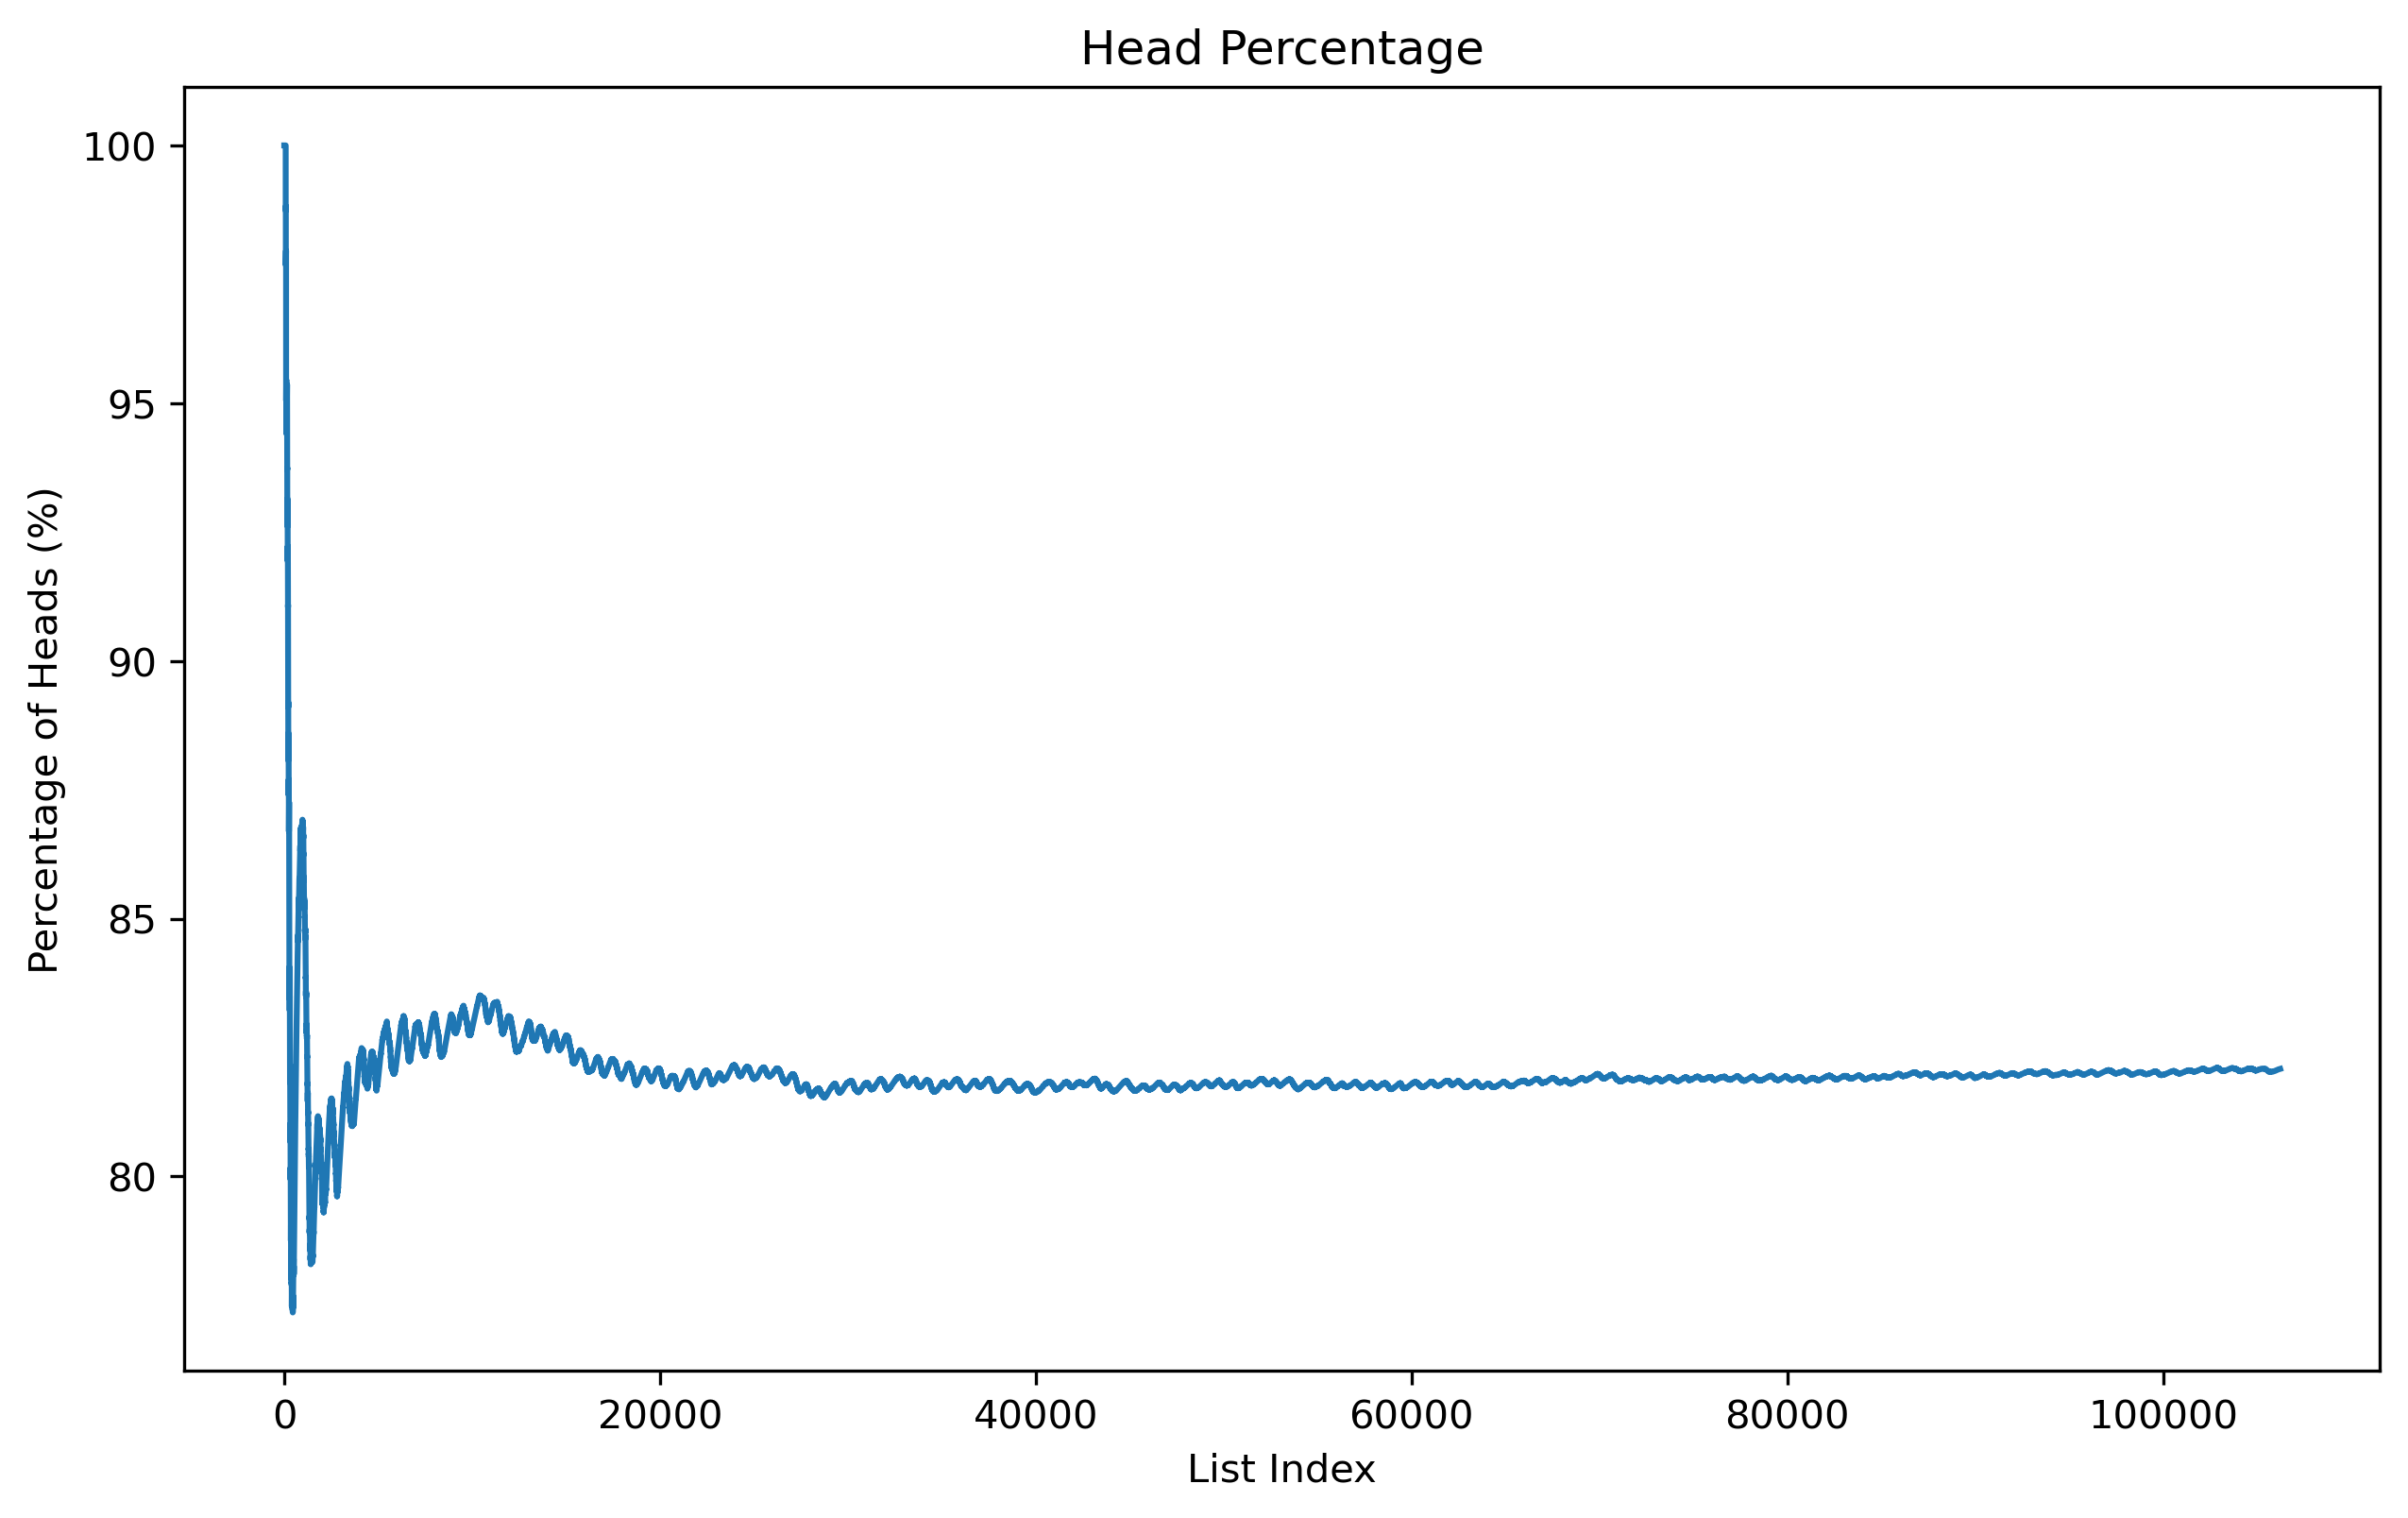

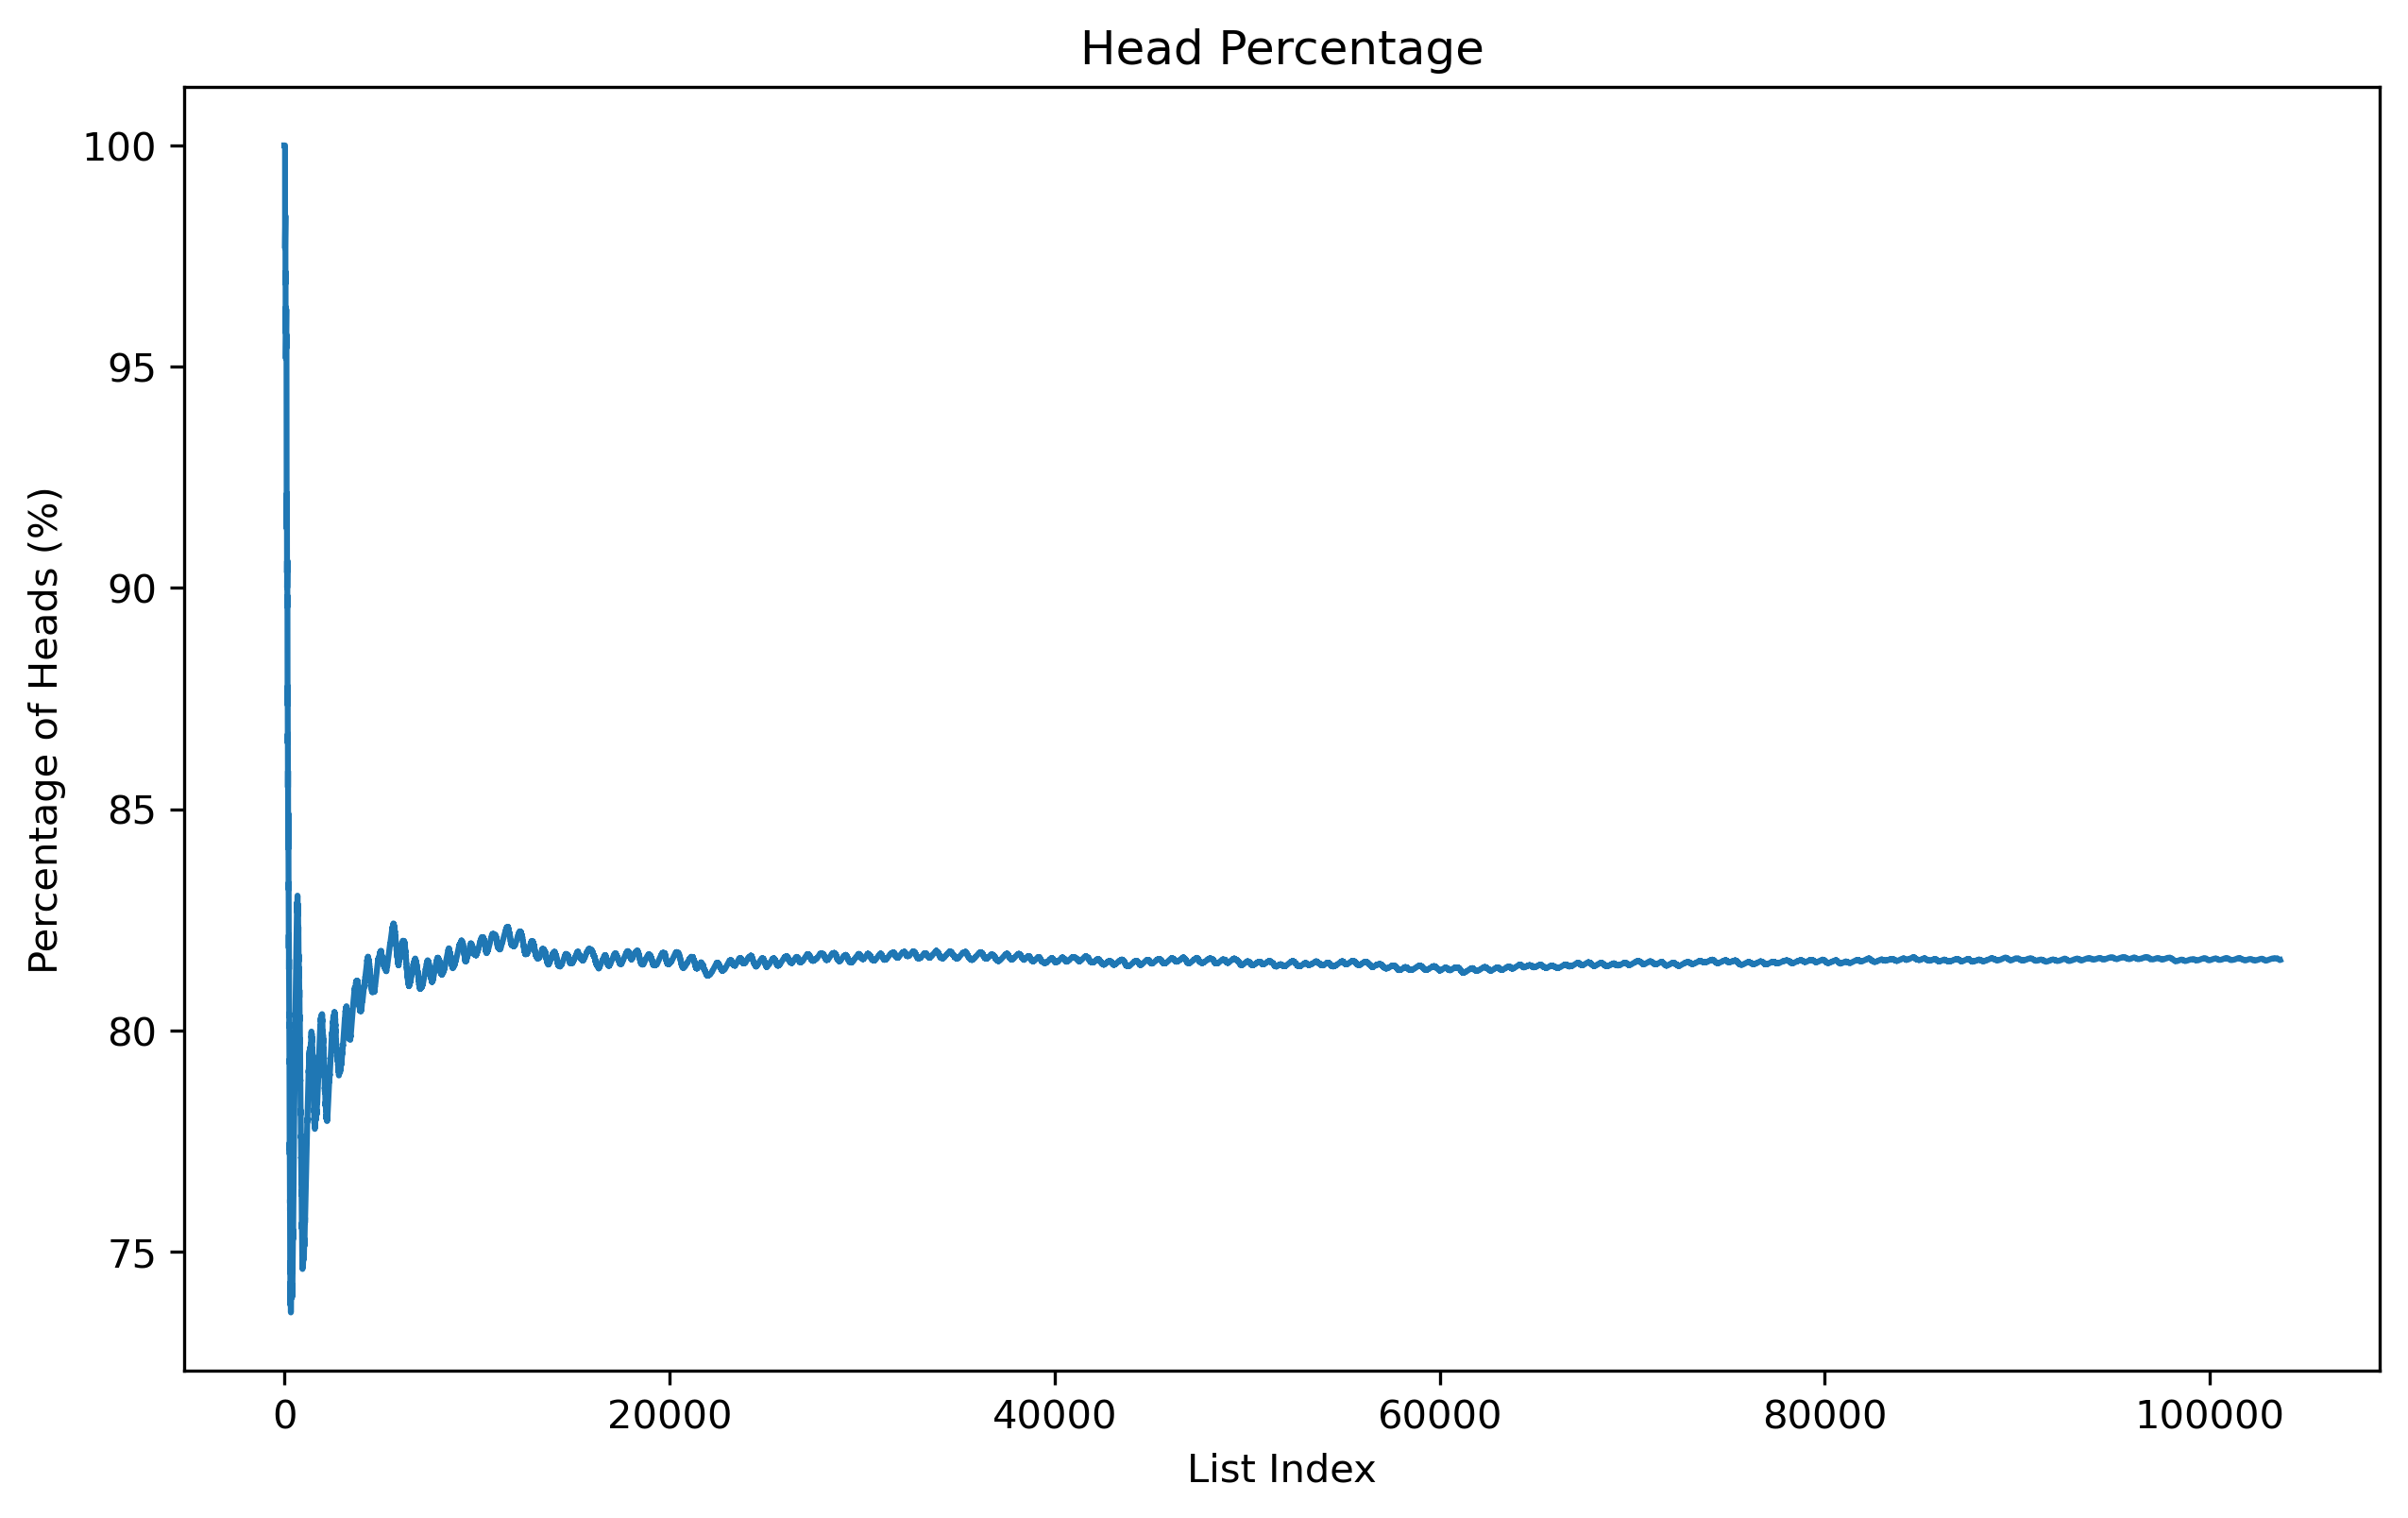

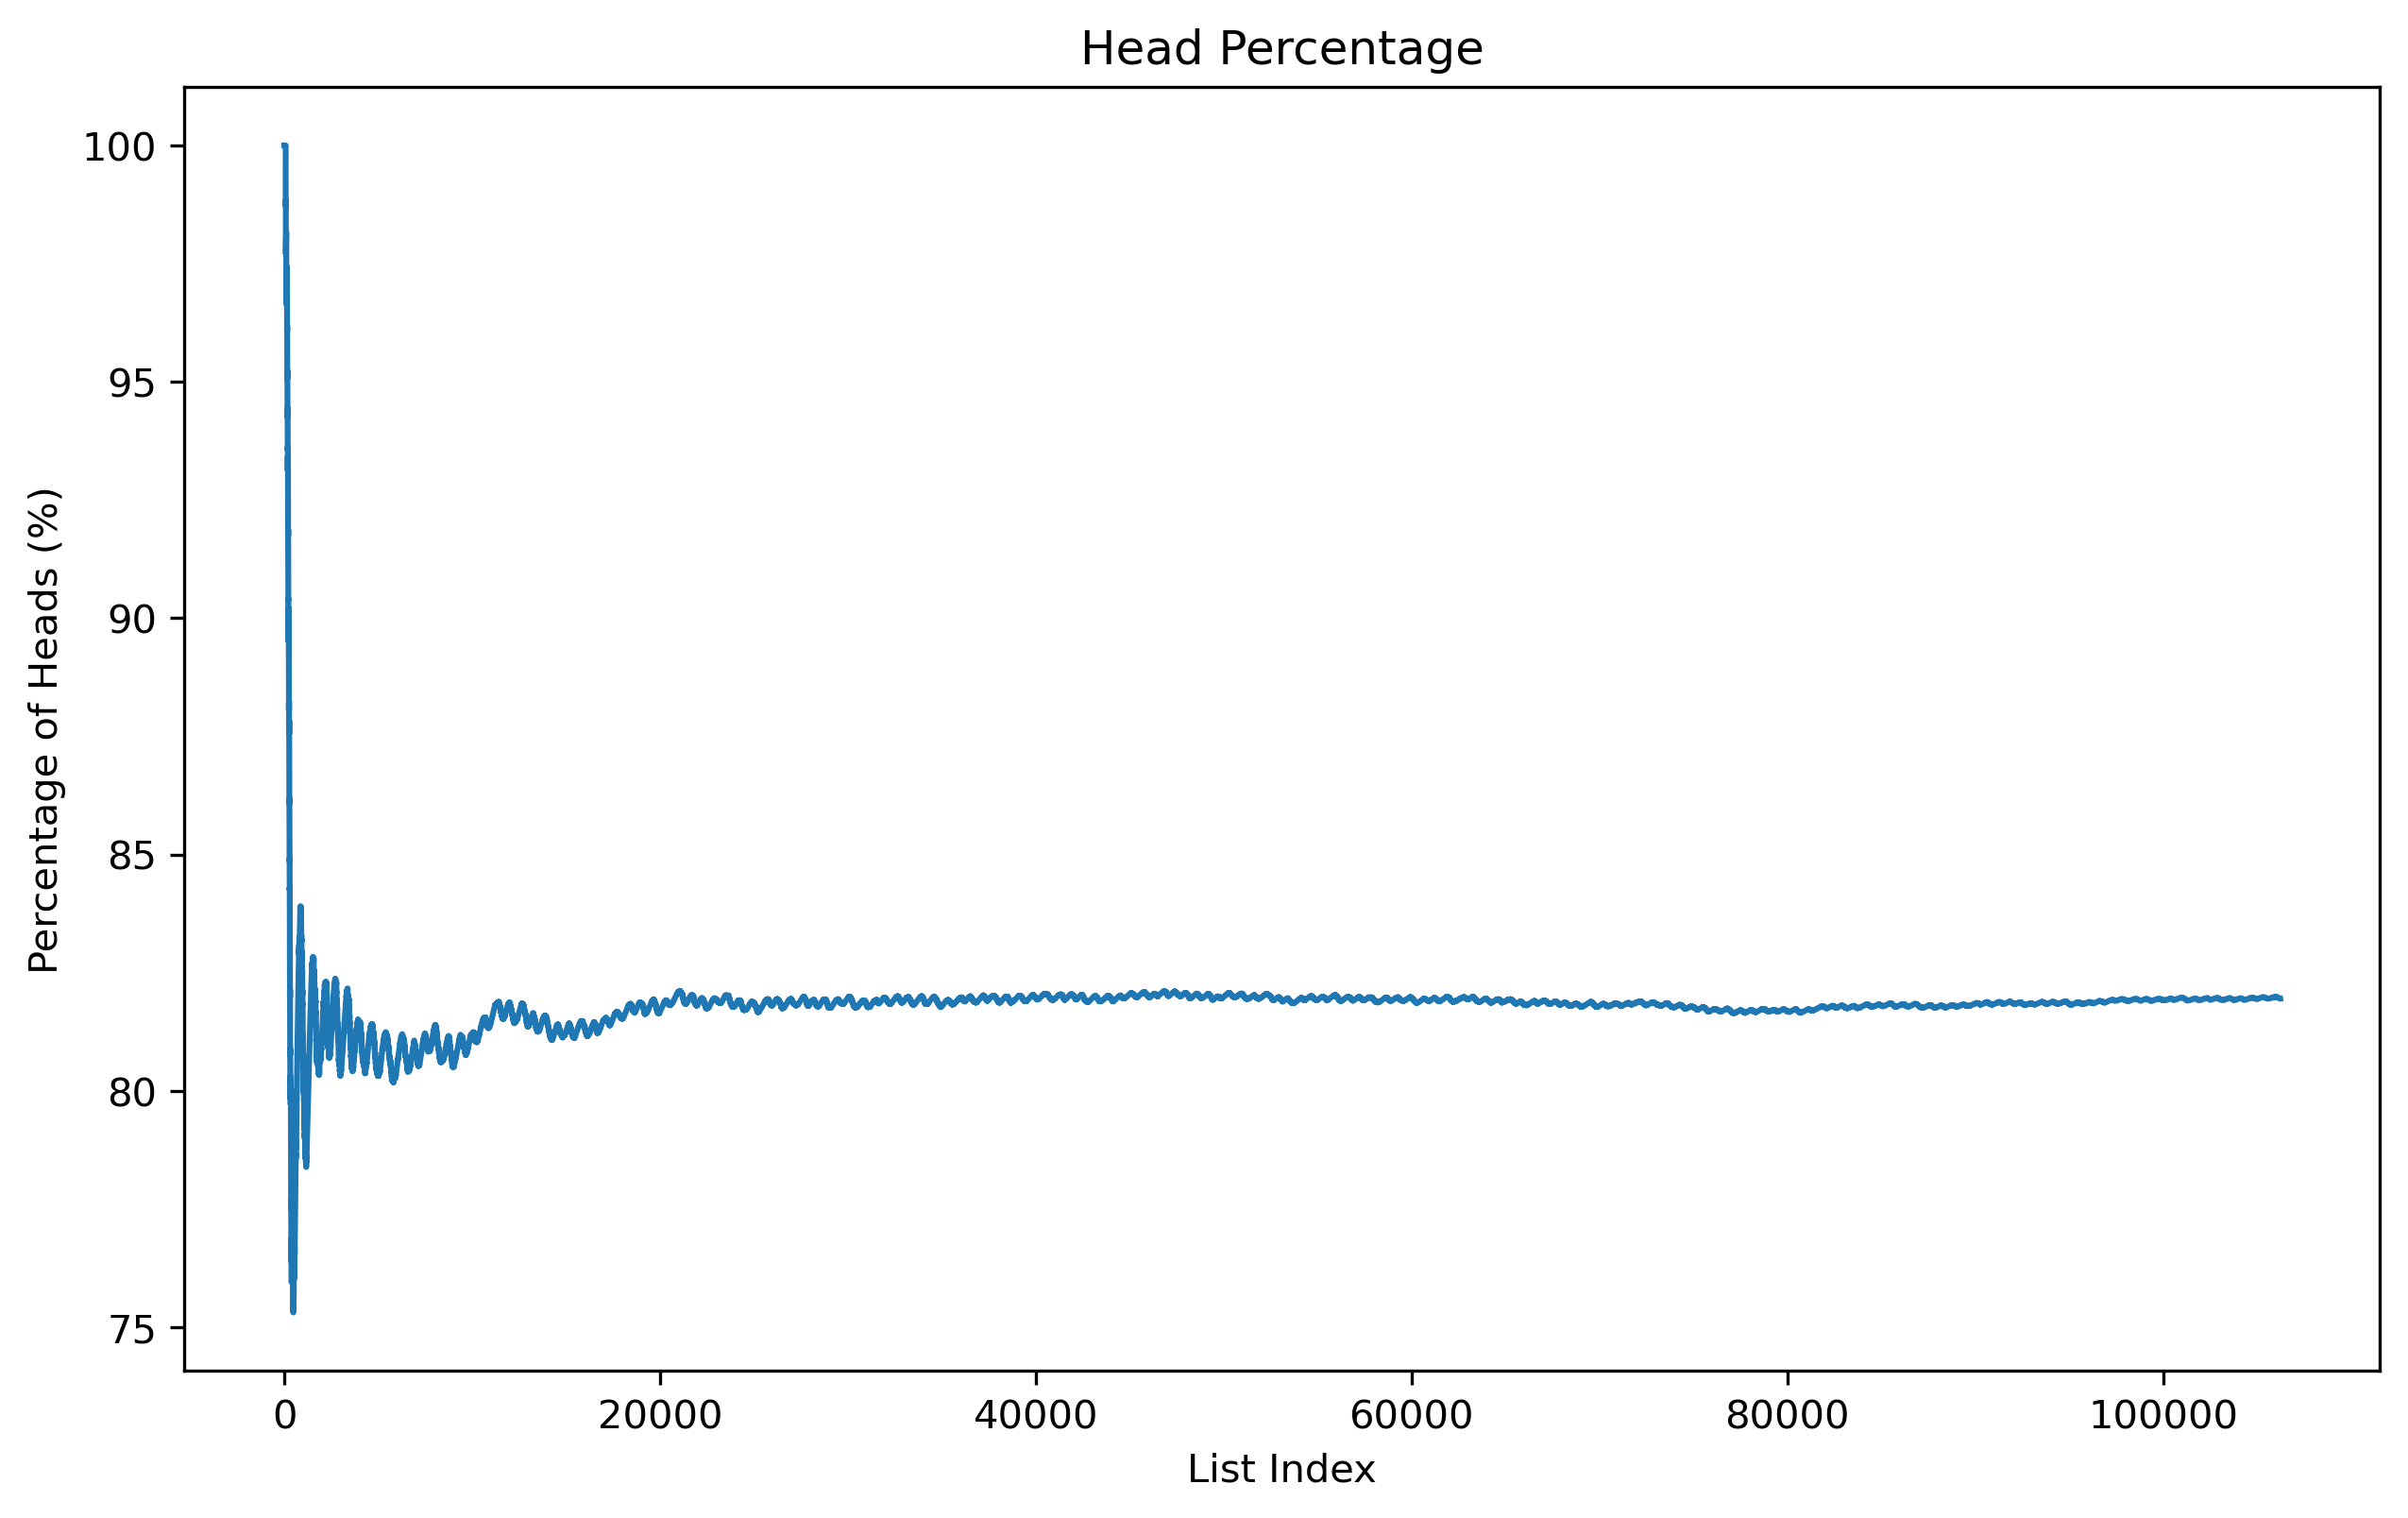

In [89]:
for p in np.arange(0.5, 1.1, 0.1):
    
    Observed_sequnce_overal = [] 
    walker = RandomWalkerOnRing(num_states, p)
    walker.reset()
    walker.current_state = 0
    
    for _ in range(10**4):
        state, waiting_time = walker.make_move()
        sequence = list_of_hmm_realizations[state].generate_sequence(waiting_time)
        Observed_sequnce_overal += sequence
    plot_head_percentage(Observed_sequnce_overal)

In [211]:
import numpy as np

def generate_waiting_time(rate):
    return np.random.exponential(scale=1/rate)


In [213]:
rate = 0.5  # Example rate parameter
waiting_time = generate_waiting_time(rate)
print(waiting_time)

2.7962805161850306


In [214]:
num_samples = 10  # Number of waiting times to generate
waiting_times = [generate_waiting_time(rate) for _ in range(num_samples)]
print(waiting_times)

[7.453990221489404, 6.655810582792335, 1.0888306703330197, 3.3991706035490044, 0.015139108143403373, 1.007086312577809, 4.4142369757105335, 0.39369538751215094, 0.2653397952703035, 0.5817133986131374]
